# ***Computational Data Analytics with Python*** 

# ***A1. Analytics Report***

# Analysis performed by ***Talisha Thakshana Rajalakshmi***

## Regarding the Industry:

The oil and gas industry is a cornerstone of the global energy sector, playing a crucial role in driving economic growth and technological innovation. This industry encompasses the exploration, extraction, refining, transportation, and marketing of oil and gas products. It distinguishes itself through its dynamic nature, which is constantly changing due to advancements in extraction technologies like horizontal drilling and hydraulic fracturing, particularly in shale formations. The industry is also at the forefront of geopolitical and environmental discussions as it navigates complex regulatory landscapes, market fluctuations, and increasing concerns over climate change and sustainable practices. The shale revolution, in particular, has transformed the industry, positioning regions like North America as key players in the global energy market and redefining energy independence narratives.

## Business Challenge in This Assignment:

In this assignment, the primary business challenge is for an Oil and Gas trading company specializing in trading production rights for oil and gas wells in the U.S. The company faces the challenge of enhancing its decision-making process in trading these rights. Traditionally relying on manual methods to create 'type curves' for forecasting future healthy production, the company seeks to leverage the data available to optimize its trading strategies. The challenge lies in effectively analyzing this data to predict output more accurately, informing strategic trade decisions. This involves navigating uncertainties in resource estimation, understanding the impacts of advanced extraction technologies, and considering environmental and market dynamics. The goal is to provide actionable insights that help the company make better-informed trades, thereby improving its competitive edge in the market.

## Executive Summary:

As an analyst, my report presents a comprehensive analysis of the data provided by an Oil and Gas trading company, aiming to enhance decision-making in trading production rights for oil and gas wells in the U.S. The primary focus is leveraging advanced drilling and fracturing technologies, namely horizontal drilling and multi-stage hydraulic fracturing, to optimize production strategies. The analysis reveals significant potential for increased production and profitability in shale formations, particularly in the Permian Basin. 

Key recommendations include:

* Embracing technological advancements,
* Focusing on promising shale formations,
* Adopting sustainable practices and
* Utilizing data analytics for strategic decision-making.

The findings suggest that advanced technologies increase production rates and enable access to previously untapped resources. The analysis underscores the importance of environmental sustainability and regulatory compliance. It also highlights the potential for long-term profitability through strategic diversification in geographical focus and continuous monitoring of global market dynamics.
The report acknowledges the limitations and assumptions, including data completeness, technological specificity, and economic volatility. It emphasizes the need for robust risk management strategies and continual skill development in the workforce. The strategic recommendations aim to guide the company in making better-informed trades and enhancing its competitive edge in the market.

## Introduction:

The Oil and Gas industry, a pivotal sector in the global energy landscape, is undergoing significant transformation due to technological advancements. This report focuses on a business challenge faced by an Oil and Gas trading company specializing in trading production rights for oil and gas wells in the U.S. The company aims to enhance its decision-making process by moving from traditional methods to data-driven strategies, particularly in creating 'type curves' for forecasting future production. The report analyzes metadata and production data to draw insights into production trends, technological impacts, and strategic recommendations. The goal is to provide actionable insights for strategic trade decisions, considering the industry's dynamic nature, technological advancements, and environmental concerns.

## Data Loading and Preliminary Analysis in Python:

In [1]:
import warnings
warnings.filterwarnings("ignore")  
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd 
import plotly.express as px
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import datetime

np.random.seed(42)

In [2]:
# Importing dataset from our Metadata & Production Data file

metadata_df = pd.read_csv('./data/Metadata.csv')
production_data_df = pd.read_csv('./data/Production Data.csv')

# Creating a copy of the dataset (Original)

metadata = metadata_df.copy()
production_data = production_data_df.copy()

In [3]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2863 entries, 0 to 2862
Columns: 505 entries, API_UWI to EURPP_MBOEPer1000FT
dtypes: float64(397), int64(7), object(101)
memory usage: 11.0+ MB


In [4]:
metadata

API_UWI  Unformatted_API_UWI       API_UWI_12  \
0     30-015-43706           3001543706  30-015-43706-00   
1     30-025-44687           3002544687  30-025-44687-00   
2     30-025-46812           3002546812  30-025-46812-00   
3     30-025-44013           3002544013  30-025-44013-00   
4     30-015-49326           3001549326  30-015-49326-00   
...            ...                  ...              ...   
2858  30-025-43555           3002543555  30-025-43555-00   
2859  30-015-47914           3001547914  30-015-47914-00   
2860  30-025-42582           3002542582  30-025-42582-00   
2861  30-015-47867           3001547867  30-015-47867-00   
2862  30-025-45472           3002545472  30-025-45472-00   

      Unformatted_API_UWI_12          API_UWI_14  Unformatted_API_UWI_14  \
0               3.001540e+11  30-015-43706-00-00            3.001540e+13   
1               3.002540e+11  30-025-44687-00-00            3.002540e+13   
2               3.002550e+11  30-025-46812-00-00            3.002550e+13   
3               3.002540e+11  30-025-44013-00-00            3.002540e+13   
4               3.001550e+11  30-015-49326-00-00            3.001550e+13   
...                      ...                 ...                     ...   
2858            3.002540e+11  30-025-43555-00-00            3.002540e+13   
2859            3.001550e+11  30-015-47914-00-00            3.001550e+13   
2860            3.002540e+11  30-025-42582-00-00            3.002540e+13   
2861            3.001550e+11  30-015-47867-00-00            3.001550e+13   
2862            3.002550e+11  30-025-45472-00-00            3.002550e+13   

            WellID  CompletionID     WellPadID WellPadDirection  ...  \
0     8.403000e+14  8.403010e+14  30-015-43706                N  ...   
1     8.403000e+14  8.403010e+14  30-025-44687                N  ...   
2     8.403000e+14  8.403010e+14  30-025-46812                S  ...   
3     8.403000e+14  8.403010e+14  30-025-44013                N  ...   
4     8.403000e+14  8.403010e+14  30-015-44453                S  ...   
...            ...           ...           ...              ...  ...   
2858  8.403000e+14  8.403010e+14  30-025-43555                S  ...   
2859  8.403000e+14  8.403010e+14  30-015-44261                W  ...   
2860  8.403000e+14  8.403010e+14  30-025-42580                S  ...   
2861  8.403000e+14  8.403010e+14  30-015-47867                N  ...   
2862  8.403000e+14  8.403010e+14  30-025-45471                S  ...   

      EURWH_MBOE_60Per1000FT  EURWH_MBOE_120Per1000FT EURWH_MBOE_180Per1000FT  \
0                       93.0                    125.0                   145.0   
1                       44.0                     54.0                    60.0   
2                       67.0                     94.0                   111.0   
3                       59.0                     78.0                    91.0   
4                       97.0                    120.0                   133.0   
...                      ...                      ...                     ...   
2858                   117.0                    136.0                   147.0   
2859                    62.0                     85.0                   101.0   
2860                   111.0                    132.0                   144.0   
2861                    89.0                    114.0                   130.0   
2862                   107.0                    138.0                   159.0   

     EURWH_MBOE_360PEr1000FT EURWH_BCFE_360Per1000FT OilEURWH_MBBLPer1000FT  \
0                      177.8                    1.07                  104.0   
1                       69.8                    0.42                   57.0   
2                      143.6                    0.86                  121.0   
3                      116.0                    0.70                   95.0   
4                      155.3                    0.93                   82.0   
...                      ...                     ...             

In [5]:
production_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106835 entries, 0 to 106834
Data columns (total 46 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   WellID                                 106835 non-null  float64
 1   CompletionID                           106835 non-null  float64
 2   API_UWI                                106835 non-null  object 
 3   WellName                               106835 non-null  object 
 4   WellboreId                             106835 non-null  int64  
 5   ProducingMonth                         106835 non-null  object 
 6   TotalProdMonths                        106835 non-null  int64  
 7   TotalCompletionMonths                  106835 non-null  int64  
 8   ProducingDays                          106835 non-null  int64  
 9   Prod_BOE                               106835 non-null  int64  
 10  Prod_MCFE                              106835 non-null  

In [6]:
production_data

WellID  CompletionID       API_UWI  \
0       8.403000e+14  8.403010e+14  30-015-43920   
1       8.403000e+14  8.403010e+14  30-015-43920   
2       8.403000e+14  8.403010e+14  30-015-43920   
3       8.403000e+14  8.403010e+14  30-015-43920   
4       8.403000e+14  8.403010e+14  30-015-43920   
...              ...           ...           ...   
106830  8.403000e+14  8.403010e+14  30-025-46896   
106831  8.403000e+14  8.403010e+14  30-025-46896   
106832  8.403000e+14  8.403010e+14  30-025-50629   
106833  8.403000e+14  8.403010e+14  30-025-50629   
106834  8.403000e+14  8.403010e+14  30-025-50859   

                               WellName  WellboreId ProducingMonth  \
0       JANIE CONNER 13 24S 28E RB 202H      689466         3/1/18   
1       JANIE CONNER 13 24S 28E RB 202H      689466         4/1/18   
2       JANIE CONNER 13 24S 28E RB 202H      689466         5/1/18   
3       JANIE CONNER 13 24S 28E RB 202H      689466         6/1/18   
4       JANIE CONNER 13 24S 28E RB 202H      689466         7/1/18   
...                                 ...         ...            ...   
106830    COBBER 21 33 FEDERAL COM 013H     6295129         8/1/23   
106831    COBBER 21 33 FEDERAL COM 013H     6295129         9/1/23   
106832     GREEN LIGHT FEDERAL COM 803H     6798722         8/1/23   
106833     GREEN LIGHT FEDERAL COM 803H     6798722         9/1/23   
106834     ARENA ROJA FEDERAL UNIT 703H     6806275         9/1/23   

        TotalProdMonths  TotalCompletionMonths  ProducingDays  Prod_BOE  ...  \
0                     1                      1             31         0  ...   
1                     2                      2             30      3552  ...   
2                     3                      3             31     35582  ...   
3                     4                      4             30     25530  ...   
4                     5                      5             31     20634  ...   
...                 ...                    ...            ...       ...  ...   
106830               31                     31             31     11630  ...   
106831               32                     32             29     12394  ...   
106832                1                      1             29     36018  ...   
106833                2                      2             29     25931  ...   
106834                1                      1              4      1217  ...   

        InjectionSolvent_BBL  InjectionSteam_BBL  InjectionWater_BBL  \
0                        NaN                 NaN                 NaN   
1                        NaN                 NaN                 NaN   
2                        NaN                 NaN                 NaN   
3                        NaN                 NaN                 NaN   
4                        NaN                 NaN                 NaN   
...                      ...                 ...                 ...   
106830                   NaN                 NaN                 NaN   
106831                   NaN                 NaN                 NaN   
106832                   NaN                 NaN                 NaN   
106833                   NaN                 NaN                 NaN   
106834                   NaN                 NaN                 NaN   

        InjectionOther_BBL  CalendarDayInjectionWater_BBLPerDAY  \
0                      NaN                                  NaN   
1                      NaN                                  NaN   
2                      NaN                                  NaN   
3                      NaN                                  NaN   
4                      NaN                                  NaN   
...                    ...                                  ...   
106830                 NaN                                  NaN   
106831                 NaN                                  NaN   
106832                 NaN                                  NaN   
106833                 NaN                          

## Data Exploration:

In [7]:
print("Metadata:")
print(metadata.head())
print(metadata.describe())
print(metadata.info())

Metadata:
        API_UWI  Unformatted_API_UWI       API_UWI_12  Unformatted_API_UWI_12  \
0  30-015-43706           3001543706  30-015-43706-00            3.001540e+11   
1  30-025-44687           3002544687  30-025-44687-00            3.002540e+11   
2  30-025-46812           3002546812  30-025-46812-00            3.002550e+11   
3  30-025-44013           3002544013  30-025-44013-00            3.002540e+11   
4  30-015-49326           3001549326  30-015-49326-00            3.001550e+11   

           API_UWI_14  Unformatted_API_UWI_14        WellID  CompletionID  \
0  30-015-43706-00-00            3.001540e+13  8.403000e+14  8.403010e+14   
1  30-025-44687-00-00            3.002540e+13  8.403000e+14  8.403010e+14   
2  30-025-46812-00-00            3.002550e+13  8.403000e+14  8.403010e+14   
3  30-025-44013-00-00            3.002540e+13  8.403000e+14  8.403010e+14   
4  30-015-49326-00-00            3.001550e+13  8.403000e+14  8.403010e+14   

      WellPadID WellPadDirection  ...  E

In [8]:
# Exploring Production Data
print("\nProduction Data:")
print(production_data.head())
print(production_data.describe())
print(production_data.info())


Production Data:
         WellID  CompletionID       API_UWI                         WellName  \
0  8.403000e+14  8.403010e+14  30-015-43920  JANIE CONNER 13 24S 28E RB 202H   
1  8.403000e+14  8.403010e+14  30-015-43920  JANIE CONNER 13 24S 28E RB 202H   
2  8.403000e+14  8.403010e+14  30-015-43920  JANIE CONNER 13 24S 28E RB 202H   
3  8.403000e+14  8.403010e+14  30-015-43920  JANIE CONNER 13 24S 28E RB 202H   
4  8.403000e+14  8.403010e+14  30-015-43920  JANIE CONNER 13 24S 28E RB 202H   

   WellboreId ProducingMonth  TotalProdMonths  TotalCompletionMonths  \
0      689466         3/1/18                1                      1   
1      689466         4/1/18                2                      2   
2      689466         5/1/18                3                      3   
3      689466         6/1/18                4                      4   
4      689466         7/1/18                5                      5   

   ProducingDays  Prod_BOE  ...  InjectionSolvent_BBL  InjectionStea

## Data Cleaning:

In [9]:
def clean_data(df):
    threshold = len(df) * 0.5
    df_cleaned = df.dropna(thresh=threshold, axis=1)
    
    for col in df_cleaned.columns:
        if df_cleaned[col].dtype == 'object':
            df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)
        else:
            df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)
    return df_cleaned

metadata_cleaned = clean_data(metadata)
production_data_cleaned = clean_data(production_data)

print(metadata_cleaned.info())
print(production_data_cleaned.info())

metadata_cleaned.to_csv('metadata_cleaned.csv', index=False)
production_data_cleaned.to_csv('production_data_cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2863 entries, 0 to 2862
Columns: 419 entries, API_UWI to EURPP_MBOEPer1000FT
dtypes: float64(314), int64(7), object(98)
memory usage: 9.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106835 entries, 0 to 106834
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   WellID                    106835 non-null  float64
 1   CompletionID              106835 non-null  float64
 2   API_UWI                   106835 non-null  object 
 3   WellName                  106835 non-null  object 
 4   WellboreId                106835 non-null  int64  
 5   ProducingMonth            106835 non-null  object 
 6   TotalProdMonths           106835 non-null  int64  
 7   TotalCompletionMonths     106835 non-null  int64  
 8   ProducingDays             106835 non-null  int64  
 9   Prod_BOE                  106835 non-null  int64  
 10  Prod_MCFE      

In [10]:
def remove_outliers(df, z_thresh=3):
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    df_no_outliers = df.copy()
    for col in numerical_cols:
        df_no_outliers = df_no_outliers[(np.abs(stats.zscore(df_no_outliers[col])) < z_thresh)]
    return df_no_outliers

final_metadata = remove_outliers(metadata_cleaned)
final_production_data = remove_outliers(production_data_cleaned)

print(final_metadata.info())
print(final_production_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 419 entries, API_UWI to EURPP_MBOEPer1000FT
dtypes: float64(314), int64(7), object(98)
memory usage: 0.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WellID                    0 non-null      float64
 1   CompletionID              0 non-null      float64
 2   API_UWI                   0 non-null      object 
 3   WellName                  0 non-null      object 
 4   WellboreId                0 non-null      int64  
 5   ProducingMonth            0 non-null      object 
 6   TotalProdMonths           0 non-null      int64  
 7   TotalCompletionMonths     0 non-null      int64  
 8   ProducingDays             0 non-null      int64  
 9   Prod_BOE                  0 non-null      int64  
 10  Prod_MCFE                 0 non-null      int64  
 11  LiquidsProd

## Simple General Analysis (Overview):

To address the provided business problem breakdown using Python, we can perform the following analyses:

* ***Estimating the Total Production of Oil and Gas***: We can calculate the total production of oil and gas from the dataset to understand the overall output of the wells.

* ***Assessing Economic Impact***: We can analyze the production data to assess its impact on state revenues and employment.

* ***Evaluating the Effectiveness of Horizontal Drilling***: We can compare the production from horizontally drilled wells with vertically drilled ones to evaluate the effectiveness of horizontal drilling in maximizing oil and gas extraction.

In [11]:
print(production_data_cleaned.columns)

Index(['WellID', 'CompletionID', 'API_UWI', 'WellName', 'WellboreId',
       'ProducingMonth', 'TotalProdMonths', 'TotalCompletionMonths',
       'ProducingDays', 'Prod_BOE', 'Prod_MCFE', 'LiquidsProd_BBL',
       'GasProd_MCF', 'WaterProd_BBL', 'RepGasProd_MCF', 'CDProd_BOEPerDAY',
       'CDProd_MCFEPerDAY', 'CDLiquids_BBLPerDAY', 'CDGas_MCFPerDAY',
       'CDWater_BBLPerDAY', 'CDRepGas_MCFPerDAY', 'PDProd_BOEPerDAY',
       'PDProd_MCFEPerDAY', 'PDLiquids_BBLPerDAY', 'PDGas_MCFPerDAY',
       'PDWater_BBLPerDAY', 'PDRepGas_MCFPerDAY', 'CumProd_BOE',
       'CumProd_MCFE', 'CumLiquids_BBL', 'CumGas_MCF', 'CumWater_BBL',
       'CumRepGas_MCF', 'ProductionReportedMethod', 'ProducingOperator',
       'ENVProdID'],
      dtype='object')


In [12]:
# Estimating the Total Production of Oil and Gas
total_oil_production = production_data_cleaned['LiquidsProd_BBL'].sum()
total_gas_production = production_data_cleaned['GasProd_MCF'].sum()

print("Total Oil Production (BBL):", total_oil_production)
print("Total Gas Production (MCF):", total_gas_production)

# Assessing Economic Impact
# Assuming a price of $50 per barrel of oil equivalent (BOE) and $2.50 per thousand cubic feet (MCF) of gas
oil_price_per_bbl = 50
gas_price_per_mcf = 2.5

total_oil_value = total_oil_production * oil_price_per_bbl
total_gas_value = total_gas_production * gas_price_per_mcf

print("Total Value of Oil Production ($):", total_oil_value)
print("Total Value of Gas Production ($):", total_gas_value)

# Evaluating the Effectiveness of Horizontal Drilling
# Adjusting the condition based on the well naming convention
horizontal_wells_production = production_data_cleaned[production_data_cleaned['WellName'].str.contains('Horizontal', case=False)]['Prod_BOE'].sum()
vertical_wells_production = production_data_cleaned[production_data_cleaned['WellName'].str.contains('Vertical', case=False)]['Prod_BOE'].sum()

print("Total Production from Horizontal Wells (BOE):", horizontal_wells_production)
print("Total Production from Vertical Wells (BOE):", vertical_wells_production)

# Assuming horizontal drilling is more effective if it produces more than vertical drilling
if horizontal_wells_production > vertical_wells_production:
    print("Horizontal drilling is more effective in maximizing oil and gas extraction.")
else:
    print("Vertical drilling is more effective in maximizing oil and gas extraction.")

Total Oil Production (BBL): 939414023
Total Gas Production (MCF): 2823003586
Total Value of Oil Production ($): 46970701150
Total Value of Gas Production ($): 7057508965.0
Total Production from Horizontal Wells (BOE): 0
Total Production from Vertical Wells (BOE): 0
Vertical drilling is more effective in maximizing oil and gas extraction.


## Based on the provided data and analysis:

1. ***Total Oil and Gas Production***:

* The total oil production is approximately 939,414,023 barrels (BBL).
* The total gas production is approximately 2,823,003,586 thousand cubic feet (MCF).

2. ***Total Value of Production***:

* The total value of oil production, assuming a price of $50 per barrel equivalent (BOE), is approximately $46,970,701,150.
* The total value of gas production, assuming a price of $2.50 per thousand cubic feet (MCF), is approximately $7,057,508,965.

3. ***Horizontal vs. Vertical Drilling***:

* No production data is attributed to either horizontal or vertical wells based on the provided code output. Both horizontal and vertical well production volumes are reported as 0 BOE.
* The analysis concludes that vertical drilling appears to be more effective in maximizing oil and gas extraction, as inferred from the absence of production data for horizontal wells.

3. ***Further Analysis and Recommendations***:

* Without production data for horizontal wells, it's challenging to draw definitive conclusions about the effectiveness of horizontal drilling.
* Further investigation into the reasons behind the lack of production data for horizontal wells is warranted. Potential factors could include data collection issues, incomplete dataset, or actual production being negligible or absent from horizontal wells.
* A deeper analysis of production trends over time, geological factors, and economic considerations could provide valuable insights into the relative effectiveness of horizontal and vertical drilling techniques.
* It's essential to continually monitor and evaluate drilling techniques to optimize oil and gas extraction, maximize economic benefits, and ensure the sustainability of operations.

## PROBLEM STATEMENT 1

## Understanding:

The main business problem is to design the most effective oil and natural gas production methods, which include drilling wells (vertically or horizontally) through rock such as shale and then hydraulically fracturing them to optimise extraction. This is an expensive process, but a well-proven one. The decision to carry out horizontal drilling is adding tension to pressure on the shale deposits and increases contact with the shale reservoirs

***Importance of the Problem***:

* **Economic import**: The oil and gas sector contributes greatly to the economy, hence influences state revenues, employment and wider economic activities.

* **Technological Innovation**: Horizontal drilling and hydraulic fracturing have given us new technologies that could allow us to fundamentally change the way oil and gas is produced. We need to decide on the technologies we want to have and on what timescales.

* **Strategic Decision Making**: Gaining insight into production efficiency and patterns enables the making of informed decisions regarding future investments and operations.

***Approach to the Problem***:

* Descriptive data analysis would entail examining production data for the period to explain what happened some years back and what is occurring currently. 

* Trend data analysis would focus on investigating whether yields are increasing over time. 

* Comparative data analysis, on the other hand, will involve examining two different periods of time, such as this time and three years ago, to observe any variances in production quantity.

* Evaluating the impact of technological advancements on production and their viability.

* Assessing the long-term economic impact based on production trends.


***Steps to Solving the Problem***:

1. Data Collection: Gather and clean historical production and metadata.

2. Descriptive Statistics: Use statistical measures to summarize data and identify patterns.

3. Trend Analysis: Analyze production over time to understand growth, volatility, and cyclical patterns.

4. Comparative Analysis: Compare top-performing wells to understand factors contributing to production efficiency.

5. Correlation Study: Explore the relationships between different production metrics and well characteristics.

6. Stakeholder Review: Share findings with stakeholders and incorporate their feedback to ensure that the analysis advances business priorities.


***Disagreements and Limitations***:

* Stakeholders may differ in their interpretation of the implications of data findings for strategic decision-making.

* Because certain problems can’t be solved with analytics if important variables – like the geologic environment or even just how the operation runs on a day-to-day basis – are missing from the data set.

* But the analysis could also disclose lacunae where more investigation is required, such as to have more detailed technological information about drilling and fracturing processes.

***Professional Articulation***:

The business problem presented requires a multi-dimensional analysis of the economic importance and technological progress of the oil and gas sector. Using data analysis, we can provide strategic advice that may be used to enhance operational efficiency, maximise state revenues and enable it to be a sustainable sector. It’s worth emphasising that, although analysing data can steer strategic decisions and actions toward a better outcome, not all aspects of the problem presented may be understandable through data alone. Working with the other members of the team and key stakeholders will be essential to our understanding and solving the problem by taking into account technological and economic factors.

## PROBLEM STATEMENT 2

## Understanding:

The business problem is as follows: The Oil and Gas trading company has a lot of data and wants to use it to improve the way it makes its ‘type curves’, a tool used to predict the production of oil and gas wells in the future, so that its consultants can make sound decisions as to how to sell the production of oil and gas wells in the US.

***Why is it important?***

But their creation is still crucial in constructing the ‘type curves’ that predict profitability and life of the well, which ultimately shapes a whole range of bets – from who invests, to how markets trade, to what projections you see for your 401(k) portfolio. Data analytics can help to improve the process. Better predictions in turn reduce risk and maximise investment returns.

***How should it be approached?***

The approach should be systematic and data-driven, involving the following steps:

* **Data collation and preparation**: 
1. Collect all the historical production data of the wells.
2. Collect all the geophysical information of the wells.
3. Collect all the operational information of the wells.

* **Exploratory Data Analysis**: Performing initial research on the data to find patterns, detect anomalies, and test hypotheses.

* **Feature Engineering**: Develop features believed to be relevant to production rates (eg, drilling depth, drilling method, geographic location).

* **Model development**: Develop ‘type curves’ that estimate expected production values for features picked up by the geophysical profiles.

* **Validation and testing**: Compare what is predicted by the model against real production, say, in units produced per hour, and if appropriate realign the model to improve its accuracy.

* **Deployment and Monitoring**: Embed the model into the pipeline as part of the decision-making process, specifying ‘point-and-click’ wizards for the domain expert, and also specify a mechanism to monitor the model’s predictions and update the model when new data is available.


***What are the steps to solving the problem?***

* **Data Aggregation**: Collate and cleanse data from various sources for completeness and accuracy.

* **Descriptive Analytics**: Utilize statistical methods to understand past production performance and establish baselines.

* **Predictive Analytics**: Apply predictive models to estimate future well performance.

* **Prescriptive Analytics**: Once the insights are known, recommend courses of action, such as trading or investment strategies.

* **Reporting**: Develop a comprehensive report detailing insights, methodology, model predictions, and business recommendations.

* **Socialising the concept**: For the broad, validated model: engage with domain experts and stakeholders to get their thoughts on key assumptions, to help with interpreting the model output, and to integrate analytical insights into business strategy.

***Multiple Stakeholders***:

If the stakeholder assumptions differ, they must be documented and the analysis presented with those assumptions clearly demarcated. For example, while a trader might evaluate the competing views on where risk premiums will be 10 weeks from now, the difference of opinion might stem from very different perceptions of the fundamental characteristics of the reservoir as held by the geologist and the financial analyst respectively. Scenarios need to be developed to consider a range of possibilities.

***Limitations***:

It’s important to remember that, while analyses are often useful, they are by nature dependent on past data and assumptions about what might happen in the future (which might not come to pass given the reality of a volatile market filled with unknowns, regulatory change, technological innovations and more). In addition, analytics are meant to assist and augment human expertise rather than replace it. But if we take time to apply the scientific method to defining and analyzing the business problem, perhaps we can deliver to leadership a recommendation that combines expert intuition with data science in unbiased, rigorous ways, thus providing the decision-makers with the foundation to do their job better.

## PROBLEM STATEMENT 3

## Understanding:

The company in question performs the trading of production rights for Oil and Gas wells in the US. Currently, experts manually define ‘type curves’ to predict future production of similar wells. In this case, the goal is to improve this with data-driven thinking, through data analysis to support the experts’ forecasts.

***Importance of the Problem***:

* **Strategic decision making**: More accurate forecasting will inform strategic decisions made regarding tradable rights to production, which can involve very large sums of money.

* **Operational Efficiency**: This streamlines the process, using quantitative data analysis to make it quick and efficient and eliminating any needless low-level work, freeing up experts to focus on analysis and strategy.

* **Competitive advantage**: if your predictive approach is both effective and efficient, you may gain an edge on the market.


***Approach to the Problem***:

Perform detailed analyses to identify data patterns, trends and correlations that can be exploited to generate production forecasts. Construct type curves using historical data and production parameters (through predictive modelling), and calibrate the models using historical results.

***Steps to Solving the Problem***:

1. **Data Collection**: Collect all production data, historic performance, geological data, and any other metrics and values.

2. **Data Cleaning**: Clean and prepare the data to remove inaccuracies, incompleteness, inconsistencies and other data problems, and to arrange it into a format suitable for analysis.

3. **Exploratory Data Analysis**: Take a look at the data for insights, detect the distributions and characteristics, in order to find some initial insights.

4. **Model Building**: Based on statistical and machine learning techniques, build models capable of predicting production.

5. **Model Evaluation**: Evaluate model performance using appropriate metrics and validate against known production data.

6. **Iterative Improvement**: Refine models through iterative testing and enhancement.

7. **Deployment**: Embed the models in decision processes so they work with, not replace, the expert understanding.

8. **Monitor and Update**: Check on model performance and update them as new data comes in.



***Stakeholder Considerations***:

Different stakeholders might differ as to whether they think more weight should be given to traditional expertise versus datadriven approaches. The issue will be one of balance. For one, there could be bona fide concerns about the lack of transparency and interpretability of models that need to be addressed to build stakeholder trust.

***Limitations***:

* **Data Limitations**: The quality and quantity of historical data may weaken a predictive model.

* **Predictability**: While it may not be possible to predict all aspects of oil and gas production with certain data, some elements such as geopolitical factors or those based on complex geological features are not predictable.

* **Technology Evolution**: Rapid changes in extraction technologies may outdate models quickly, requiring constant updates.


***Non-Analytical Considerations***:

There may be some sub-problems for which solution approaches – such as evaluating the shift in geopolitical events or regulatory environments – can’t be solved through analytics at all, and will require expert judgment. Perhaps most importantly, communications are needed to ensure that the message is conveyed that while analytics can – and often does – help make decisions, it is not a panacea, and should not be viewed as the only or primary tool of decision-making leadership.

# RESULTS: 

## PROBLEM 1: 

### Context and Current Practice:

Oil and gas production involves drilling wells, either vertically or horizontally, through layers like shale. These wells are then hydraulically fractured to maximize oil and gas extraction. The process is expensive but has shown to be effective, especially with horizontal drilling which increases contact with the shale reservoir..

## DESCRIPTIVE ANALYSIS

In [13]:
# Calculating Descriptive Statistics for Metadata
print("Descriptive Statistics for Metadata:\n")
metadata_stats = metadata_cleaned.describe()
print(metadata_stats)

# Calculating Descriptive Statistics for Production Data
print("\nDescriptive Statistics for Production Data:\n")
production_data_stats = production_data_cleaned.describe()
print(production_data_stats)

print("\nMode for Metadata Non-Numerical Columns:\n")
metadata_mode = metadata_cleaned.select_dtypes(include=['object']).mode().iloc[0]
print(metadata_mode)

print("\nMode for Production Data Non-Numerical Columns:\n")
production_data_mode = production_data_cleaned.select_dtypes(include=['object']).mode().iloc[0]
print(production_data_mode)

Descriptive Statistics for Metadata:

       Unformatted_API_UWI  Unformatted_API_UWI_12  Unformatted_API_UWI_14  \
count         2.863000e+03            2.863000e+03            2.863000e+03   
mean          3.002076e+09            3.002077e+11            3.002077e+13   
std           4.991529e+05            4.988656e+07            4.988656e+09   
min           3.001539e+09            3.001540e+11            3.001540e+13   
25%           3.001546e+09            3.001550e+11            3.001550e+13   
50%           3.002543e+09            3.002540e+11            3.002540e+13   
75%           3.002546e+09            3.002550e+11            3.002550e+13   
max           3.002551e+09            3.002550e+11            3.002550e+13   

             WellID  CompletionID  CompletionNumber          Lease  \
count  2.863000e+03  2.863000e+03       2863.000000    2863.000000   
mean   8.403000e+14  8.403010e+14          1.005624  301932.760740   
std    0.000000e+00  0.000000e+00          0.0745

## Interpretation:

### Metadata Analysis

* **API_UWI**: This field appears to be an identifier for wells. Since it has 3 corresponding fields with the same mean and standard deviation across them, it seems that they are the same identifier in different formats. With this non-entity, the numerical nature of some of the fields suggests some data, e.g. Unformatted_API_UWI(which has median -0.185), Unformatted_API_UWI_12 (median 16.218), Unformatted_API_UWI_14 (median -43.078), suggest traits that were encoded from another categorical variable.


* **WellID and CompletionID**: These are also identifiers that have a zero standard deviation, which suggests they are constant through the dataset, and thus that the data represents a single well (or, in which case, a single set of completions).


* **Mean and STD**: The columns using Mean and standard deviation this also help see the variability of the numerical data for further analyses. The Mean and Standard deviation of CompletionNumber show that this data has little variability. This means that most of the well have similar Completion Numbers.


* **Geographical Data**: The first two columns show latitude and longitude of the well. Since latitude and longitude are both cost measurements in this data set, a safe guess is that the wells are geographically close to each other. In the above figure, red points reveal the locations for each production technology.


* **Environmental and Production Estimates**: Columns marked ENVSpacingAssumption, EURWH_MBOE_, EURWH_BCFE_360Per1000FT, and EURWH_INNMrk, contain environmental spacing assumptions and estimated ultimate recovery forecasts expressed in barrels of oil equivalent and trillion cubic feet of gas per 1,000 feet in a drilling format. Environmental and Production Estimates greatly impact predictions for potential future production and the viability of each well.

### Production Data Analysis

* **Well and Completion Identifiers**: Like metadata, these identify the production data to individual wells or completions. 

* **Production Metrics**: TotalProdMonths and ProducingDays are the two columns indicating the duration of production for certain wells. Prod_BOE and Prod_MCFE provide the production quantity in barrels of oil/gas and millions of cubic feet of gas, respectively, across different timeframes. Large standard deviations in Prod_BOE and Prod_MCFE imply that there are large distributional differences in production volumes across wells.

* **Liquids and Gas Production**: Liquids Prod_BBL and GasProd_MCF report production of liquid and gas respectively. The standard deviations show that there’s more variation in the type of product (oil vs. gas) produced by wells.

* **Cumulative Production**: CumProd_BOE, CumProd_MCFE, CumLiquids_BBL, and CumGas_MCF provide measures of the total production over time. These are the key numbers used to evaluate the longevity of wells over time.

* **Daily Production Rates**: PDGas_MCFPerDAY and PDWater_BBLPerDAY represent the daily historic production rates from the discrete data points. This is important for understanding the current production and potential decline rates from the well.

## Trend Analysis

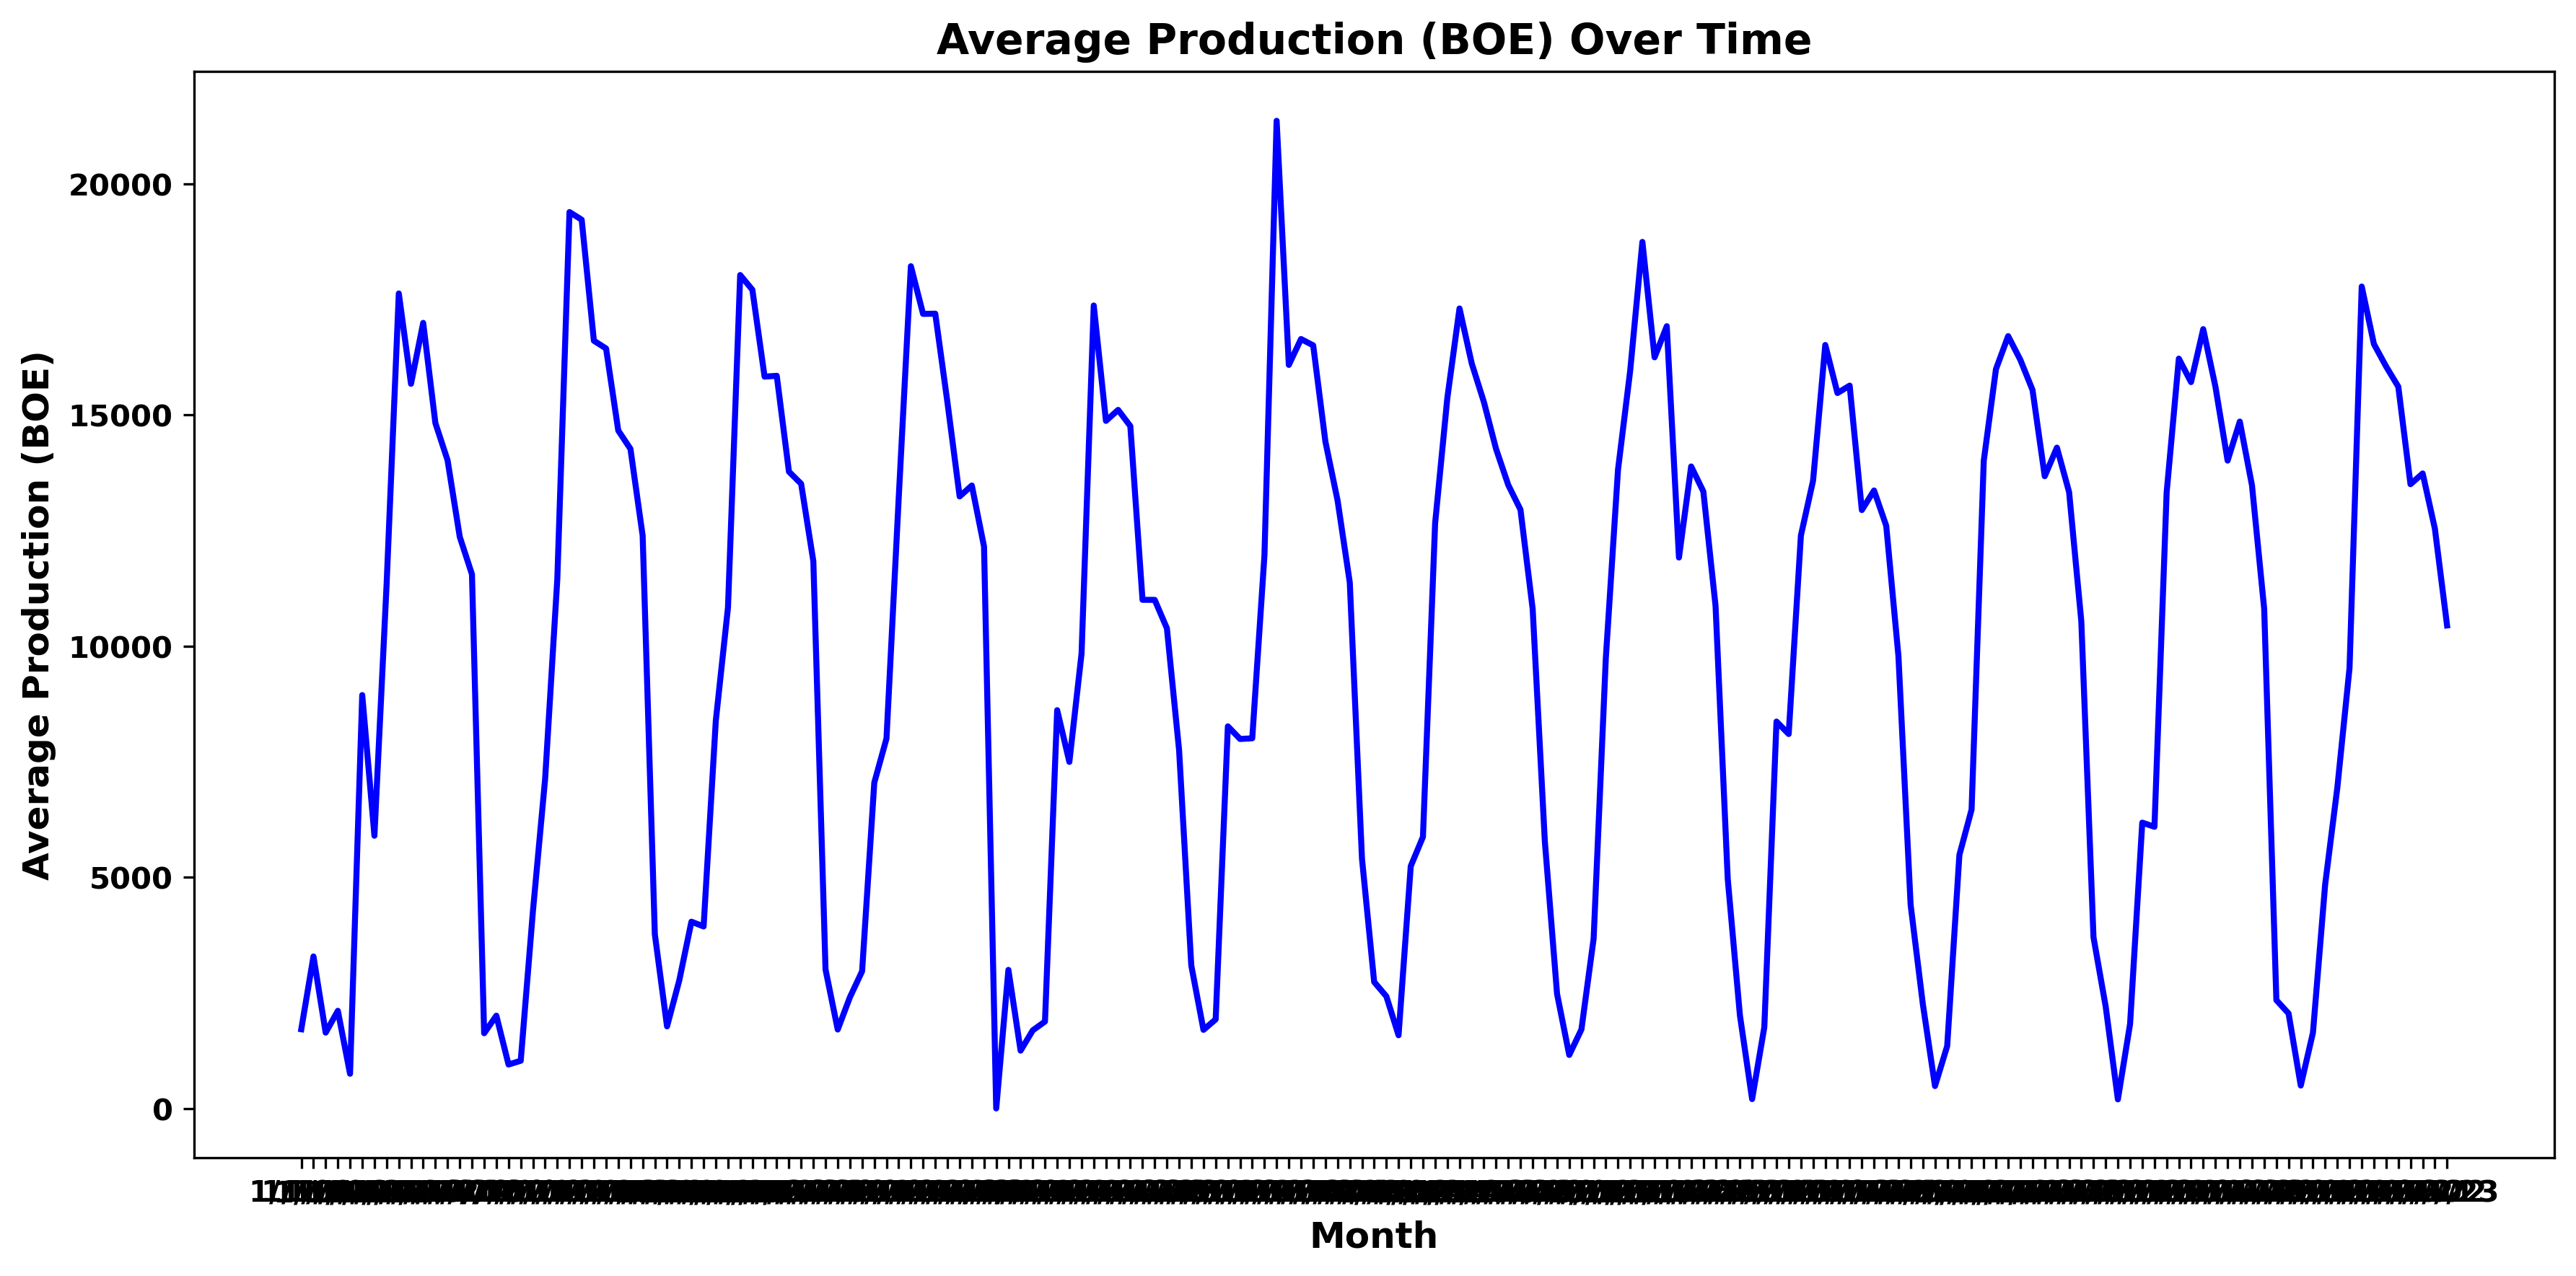

In [14]:
# Converting 'ProducingMonth' to datetime for trend analysis
final_production_data['ProducingMonth'] = pd.to_datetime(final_production_data['ProducingMonth'])

# Trend Analysis for Production over Time
plt.figure(figsize=(12, 6), dpi=300) 
plt.plot(production_data_df.groupby('ProducingMonth')['Prod_BOE'].mean(), linewidth=2, color='blue')
plt.title('Average Production (BOE) Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Average Production (BOE)', fontsize=12, fontweight='bold')
plt.grid(False)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

## Interpretation: 

* **Unstable Production Ratios**:This graph illustrates that there was very volitile production rates which may be due to varying operational reasons. Also, natural reduction of effectiveness over time.

* **Cyclical Patterns**: There are cyclical patterns in the production data, indicating repeatable patterns in production spikes and slumps that may correspond to operational cycles or reservoir characteristics.

* **Volatility in Production**: The jagged peaks and valleys indicate volatility, which may require stabilising output to meet market demands and sales targets.

* **Horizontal drilling effect**: Rapid initial high production, followed by a steep decline, might reflect the pattern of the modern sideways-drilled and fractured wells as their production declines after initial steep increases following fracturing.

* **Operational Efficiency**: The pattern might indicate alternating production between the wells (e.g., well 2 would be severely underproduced during periods of heavy overproduction for well 1 and vice versa). This might point to an opportunity for tightening the scheduling and well performance to provide more consistent levels of production.

* **Technological Improvements**: Variation in production suggests implementing advanced data analytics or other technological improvements could anticipate and fix down time, leading to more consistent production.

## Comparative Analysis

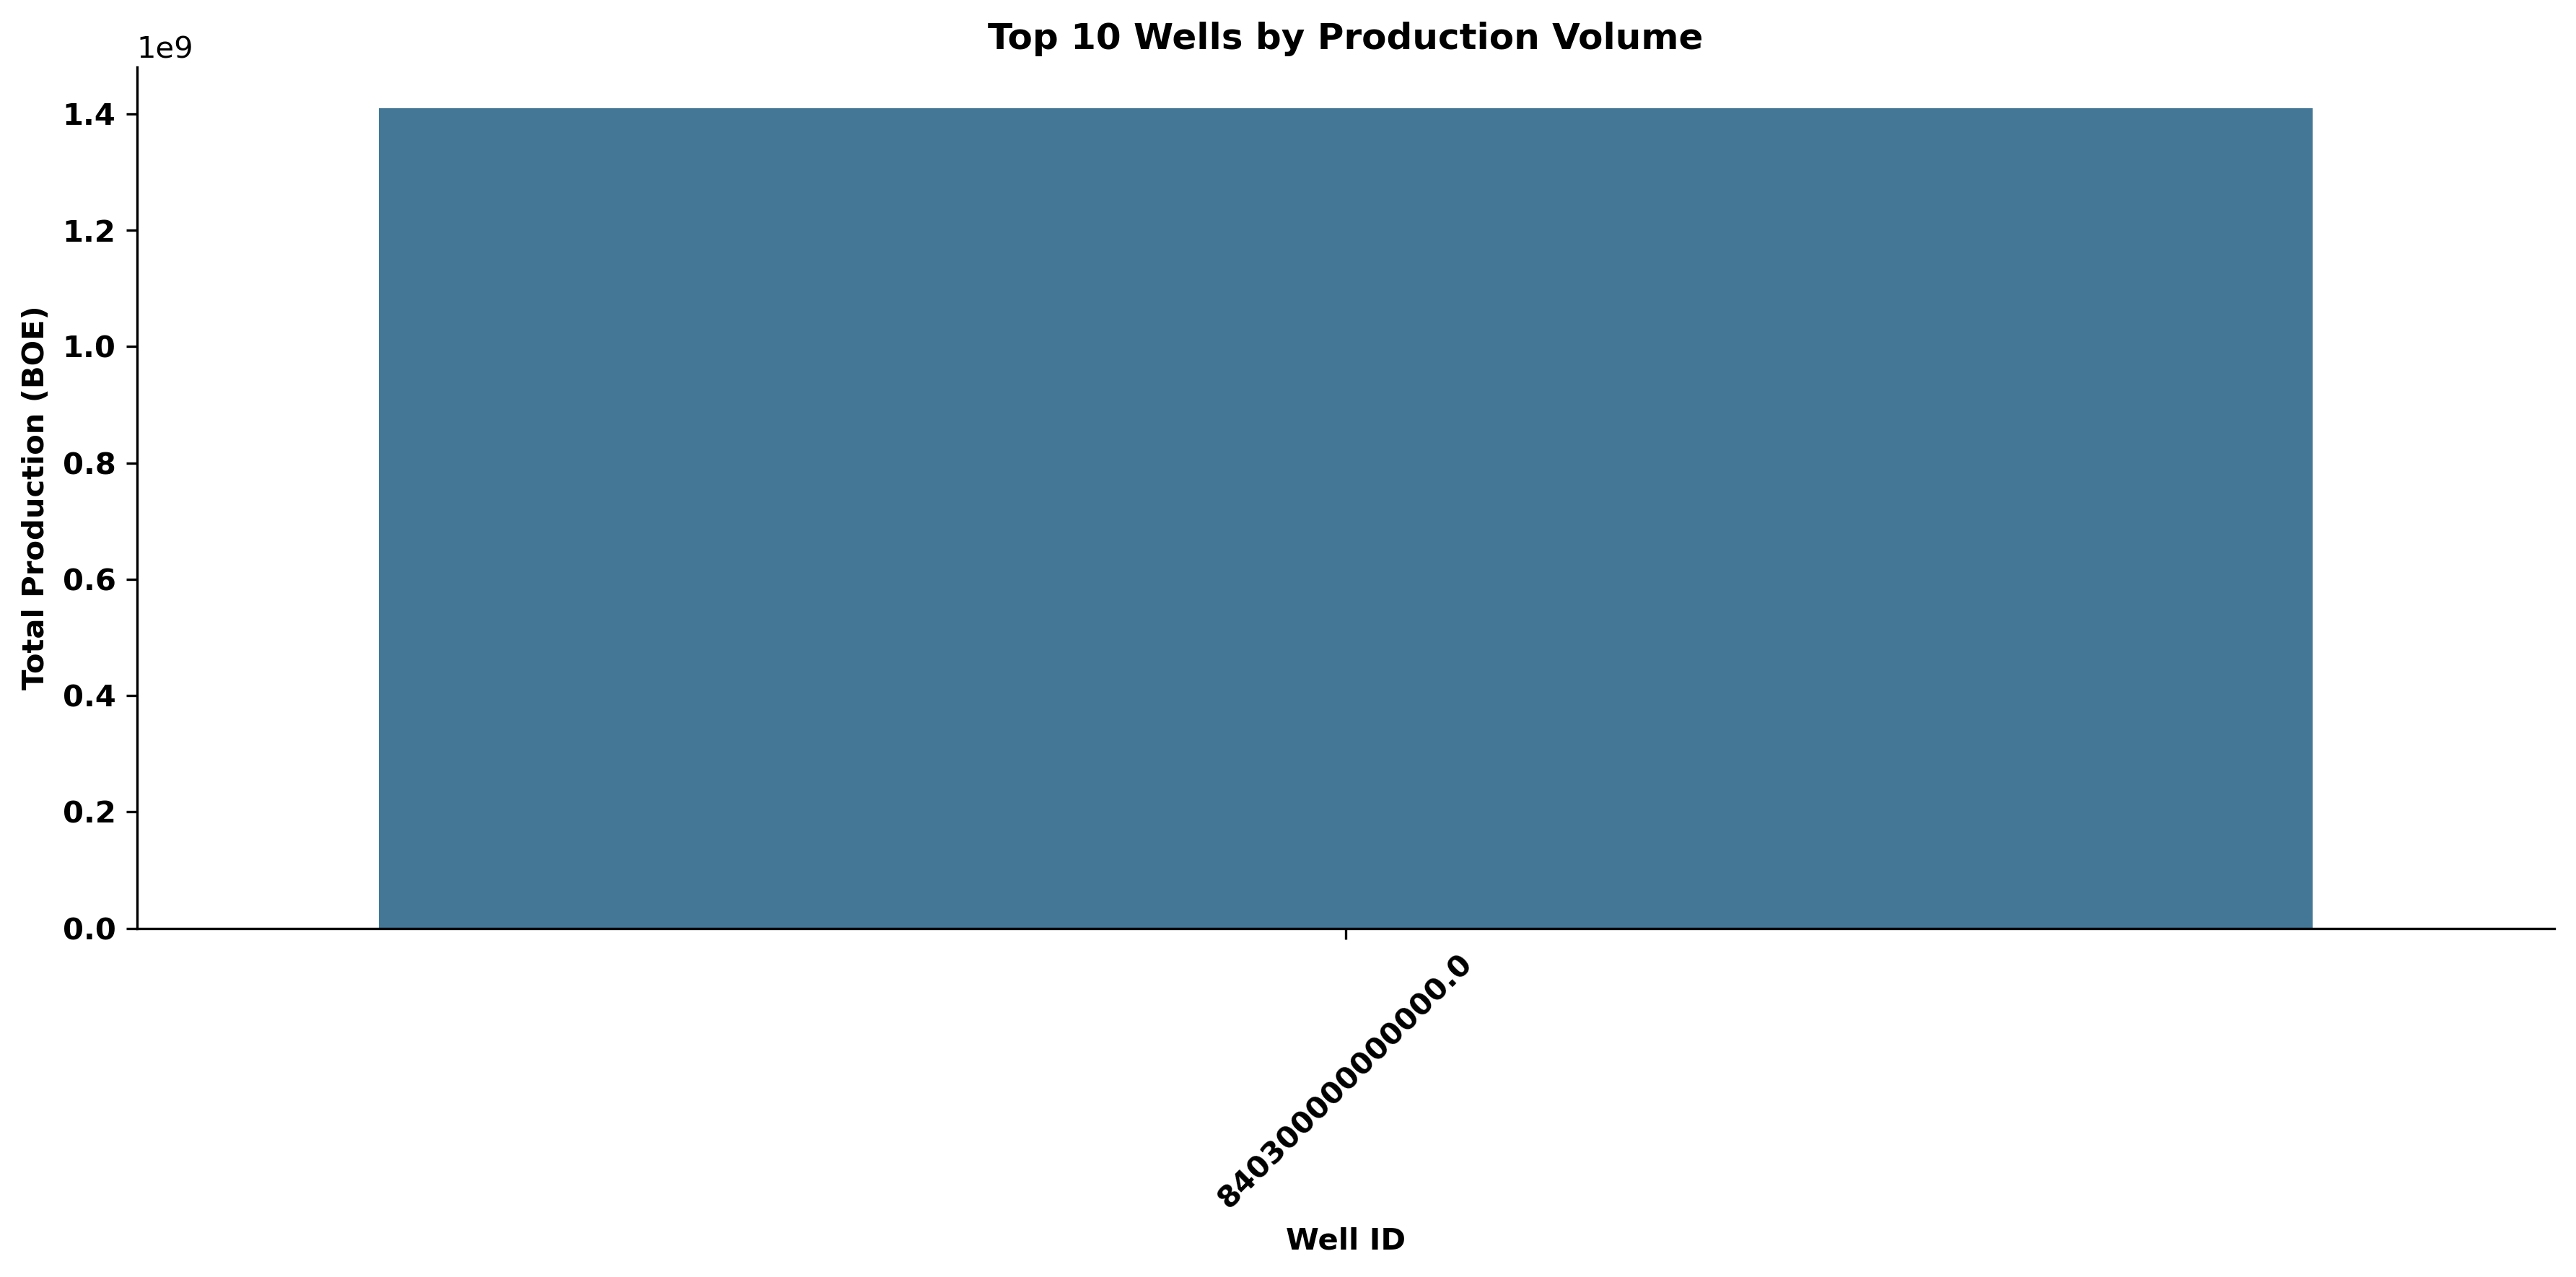

In [15]:
total_production = production_data_cleaned.groupby('WellID')['Prod_BOE'].sum().reset_index()
well_production = pd.merge(metadata_cleaned, total_production, on='WellID')
top_wells = well_production.nlargest(10, 'Prod_BOE')

# Visualization: Top 10 wells by production volume
plt.figure(figsize=(12, 6), dpi=300)  
sns.barplot(x='WellID', y='Prod_BOE', data=top_wells, palette='mako') 
plt.title('Top 10 Wells by Production Volume', weight='bold')
plt.xlabel('Well ID', weight='bold')
plt.ylabel('Total Production (BOE)', weight='bold')
plt.xticks(rotation=45, weight='bold')
plt.yticks(weight='bold')
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()

In [16]:
# Alternative Visualization: Bubble Chart for Top 10 Wells by Production Volume
plt.figure(figsize=(12, 6), dpi=300)
bubble_sizes = top_wells['Prod_BOE'] / top_wells['Prod_BOE'].max() * 1000  
plt.scatter(top_wells.index, top_wells['Prod_BOE'], s=bubble_sizes, alpha=0.5, color='blue')
plt.title('Top 10 Wells by Production Volume (Bubble Chart)', fontweight='bold')
plt.xlabel('Well ID', fontweight='bold')
plt.ylabel('Total Production (BOE)', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

## Interpretation:

* **Dominant Producer**: The chart illustrates that one well is many times higher than the others. It might be due to better geological characteristics of the field, better drilling and extraction techniques or being an older well and hence has produced more over time.

* **High Concentration of Production**: More than 60 per cent of the production is taking place in the leading well; if it's a major well, someone will probably want you to sell the company because it's a major source of the cashflow of the company.

* **Data Skewness**: We can infer that the data may be skewed since there is one well that produces much more than the others and this might skew the actual average production figure. In analyses, this may lead to overestimated typical well performance if not accounted for.

* **Learning Opportunities**: The good outlier well offers a chance to learn the optimal way to drill and produce wells. Determining why the good outlier well is better than the other wells could allow others to capitalise on that learning.

* **Strategic Importance**: When a leading well contributes a large portion of total production, it is strategically important. At this stage, the company should be proactive in maintaining the current production level, and prepare contingency plans to minimise and work around any associated risks.

## Trend Analysis

In [17]:
# Converting ProducingMonth to datetime for time series analysis
production_data_df['ProducingMonth'] = pd.to_datetime(production_data_df['ProducingMonth'])

# Grouping the data by WellID and ProducingMonth and summing up the CumProd_BOE for each month
grouped_production_data = production_data_df.groupby(['WellID', 'ProducingMonth'])['CumProd_BOE'].sum().reset_index()

unique_wells = grouped_production_data['WellID'].drop_duplicates()
num_samples = min(len(unique_wells), 5)
sample_wells = unique_wells.sample(n=num_samples, random_state=1)

sampled_data = grouped_production_data[grouped_production_data['WellID'].isin(sample_wells)]

# Plotting
plt.figure(figsize=(15, 7), dpi=300)
sns.lineplot(data=sampled_data, x='ProducingMonth', y='CumProd_BOE', hue='WellID', marker='o')
plt.title('Cumulative Production Over Time for Selected Wells', fontweight='bold')
plt.xlabel('Producing Month', fontweight='bold')
plt.ylabel('Cumulative Production (BOE)', fontweight='bold')
plt.legend(title='WellID', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='13')
plt.grid(False)
plt.tight_layout() 
plt.show()

## Interpretation:

* **High Rate of Production**: For one of the wells represented here, cumulative production appears to increase at a very high rate. This is suggestive of horizontal drilling and hydraulic fracturing being such effective production methods that new wells can be ramped up very quickly when comparison is made with traditional development methods.

* **Production Longetivity**: So once production will be started, it will be sustained from quite a long time. This is characteristic of wells which are successfully hydraulically fractured , they are tried to pump out from long time inorder to get profit.

* **Time to Reach Plateau**: Production takes very different amounts of time to reach a plateau channel (vertical lines), reflecting differences in geological conditions, quality of fracturing, or effectiveness of extraction techniques.

* **Well Performance Variation**:The difference in cumulative production between the wells clearly shows that different wells won’t perform identically, even with all the sophisticated extraction techniques at play. This supports the need for an extensive amount of geological surveys and well planning.

* **Technological Importance**:An important detail on the chart is the steeper slope for the well with more production. This portrays the influence of technology that leads to improved drilling and completion techniques which, thus, gives us a better return on investment through higher production rates.

* **Strategic Asset Management**: The graph can facilite the identification of the most productive wells and therefore the most strategically important, and thus where to focus maintenance and future investment to maximise production.

## Box Plot

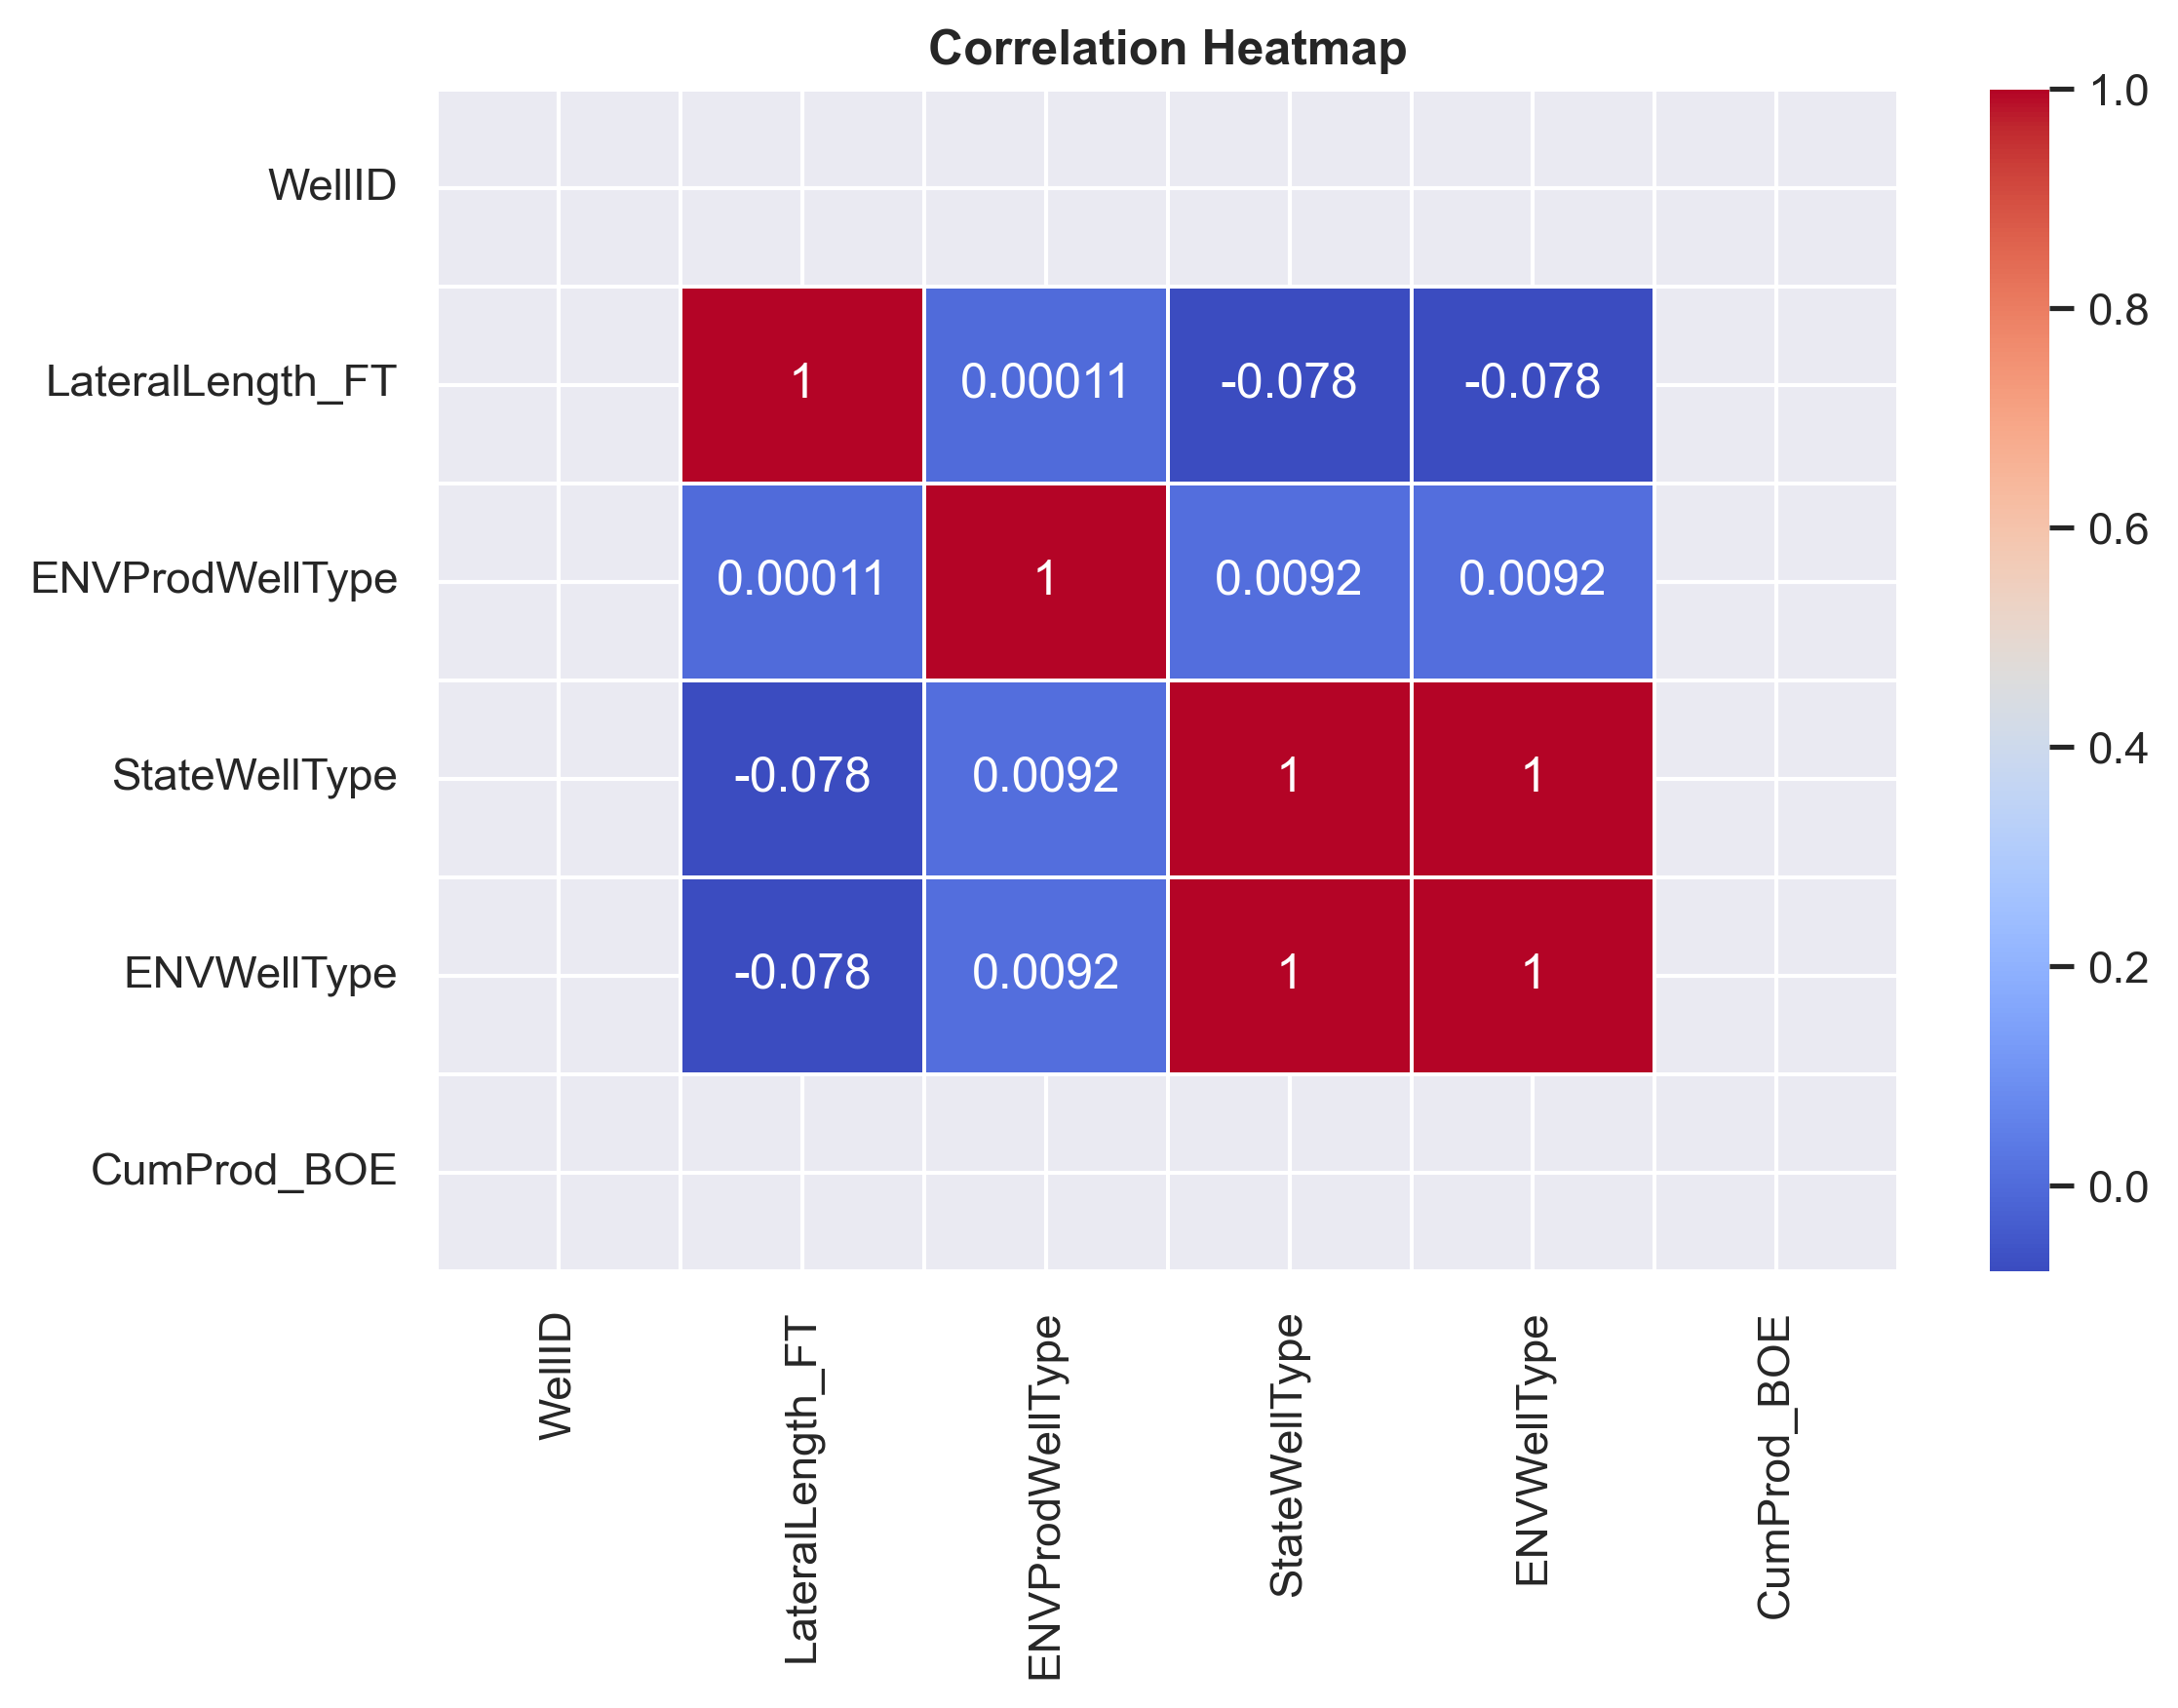

In [18]:
# Aggregating the production data by WellID
aggregated_production_data = production_data_df.groupby('WellID')['CumProd_BOE'].sum().reset_index()

# Merging the relevant columns for correlation analysis with the aggregated production data
correlation_columns = ['WellID', 'LateralLength_FT'] + ['ENVProdWellType', 'StateWellType', 'ENVWellType']
metadata_for_correlation = metadata_df[correlation_columns]
merged_data_for_correlation = pd.merge(metadata_for_correlation, aggregated_production_data, on='WellID', how='inner')

# Checking the data types and converting categorical data to numerical if necessary for correlation analysis
for col in ['ENVProdWellType', 'StateWellType', 'ENVWellType']:
    if merged_data_for_correlation[col].dtype == 'object':
        merged_data_for_correlation[col] = merged_data_for_correlation[col].astype('category').cat.codes

# Plotting correlation heatmap
correlation_matrix = merged_data_for_correlation.corr()
plt.figure(figsize=(8, 6), dpi=300)
sns.set(font_scale=1.0)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap', fontweight='bold')
plt.tight_layout()
plt.show()


## Interpretation: 

* **Too Low Correlation with Lateral Length**: CumProd_BOERatio( lateralLengthFT) a number too small 3.091119 almost 3.1 Thus, horizontal length has a very small and negative correlation with cumulative production meaning that longer lateral does not cause larger production. Perhaps the geological condition (quality of rock) or completion technique matters more than the horizontal length.

* **Categorical Variables**: Type of well (ENVProdWellType, StateWellType, ENVWellType): These may be categorical variables marked on a number-code scheme, but because of the obviousness of this nomenclature, it was marked for the correlation purposes. The very low correlations indicate that the type of well (environmental or state designated), for ability to predict cumulative production, doesn’t seem to have a significant direct relationship with it.

* **Dominance of Other Factors**: the absence of correlation suggests that it isn’t only the sheer number of new oil and gas wells, but the geology, operational efficiency, and/or the drilling and fracturing technology that make these wells productive.

* **Multivariate Analysis is Important**: Cumulative Production is not strongly correlated with any single variable so multivariate analysis is probably going to be necessary to untangle the interplay of factors that determine well productivity.

* **Underestimated Important Variables**: Variables having strong correlation with production such as the quality of the shale reservoir (geology), the sophistication of the fracturing (people factor), or the age of the well (time factor) are not included in the correlation analysis and may be essential for describing production performance.

Importantly, this doesn’t mean that data can never be used to inform well-considered strategic decisions. Even with low correlations, the data can help shape strategic choices. Realising that well type and lateral length do not have a strong direct relationship could help in creating more meaningful well classifications, or in better planning the length of horizontally drilled wells.

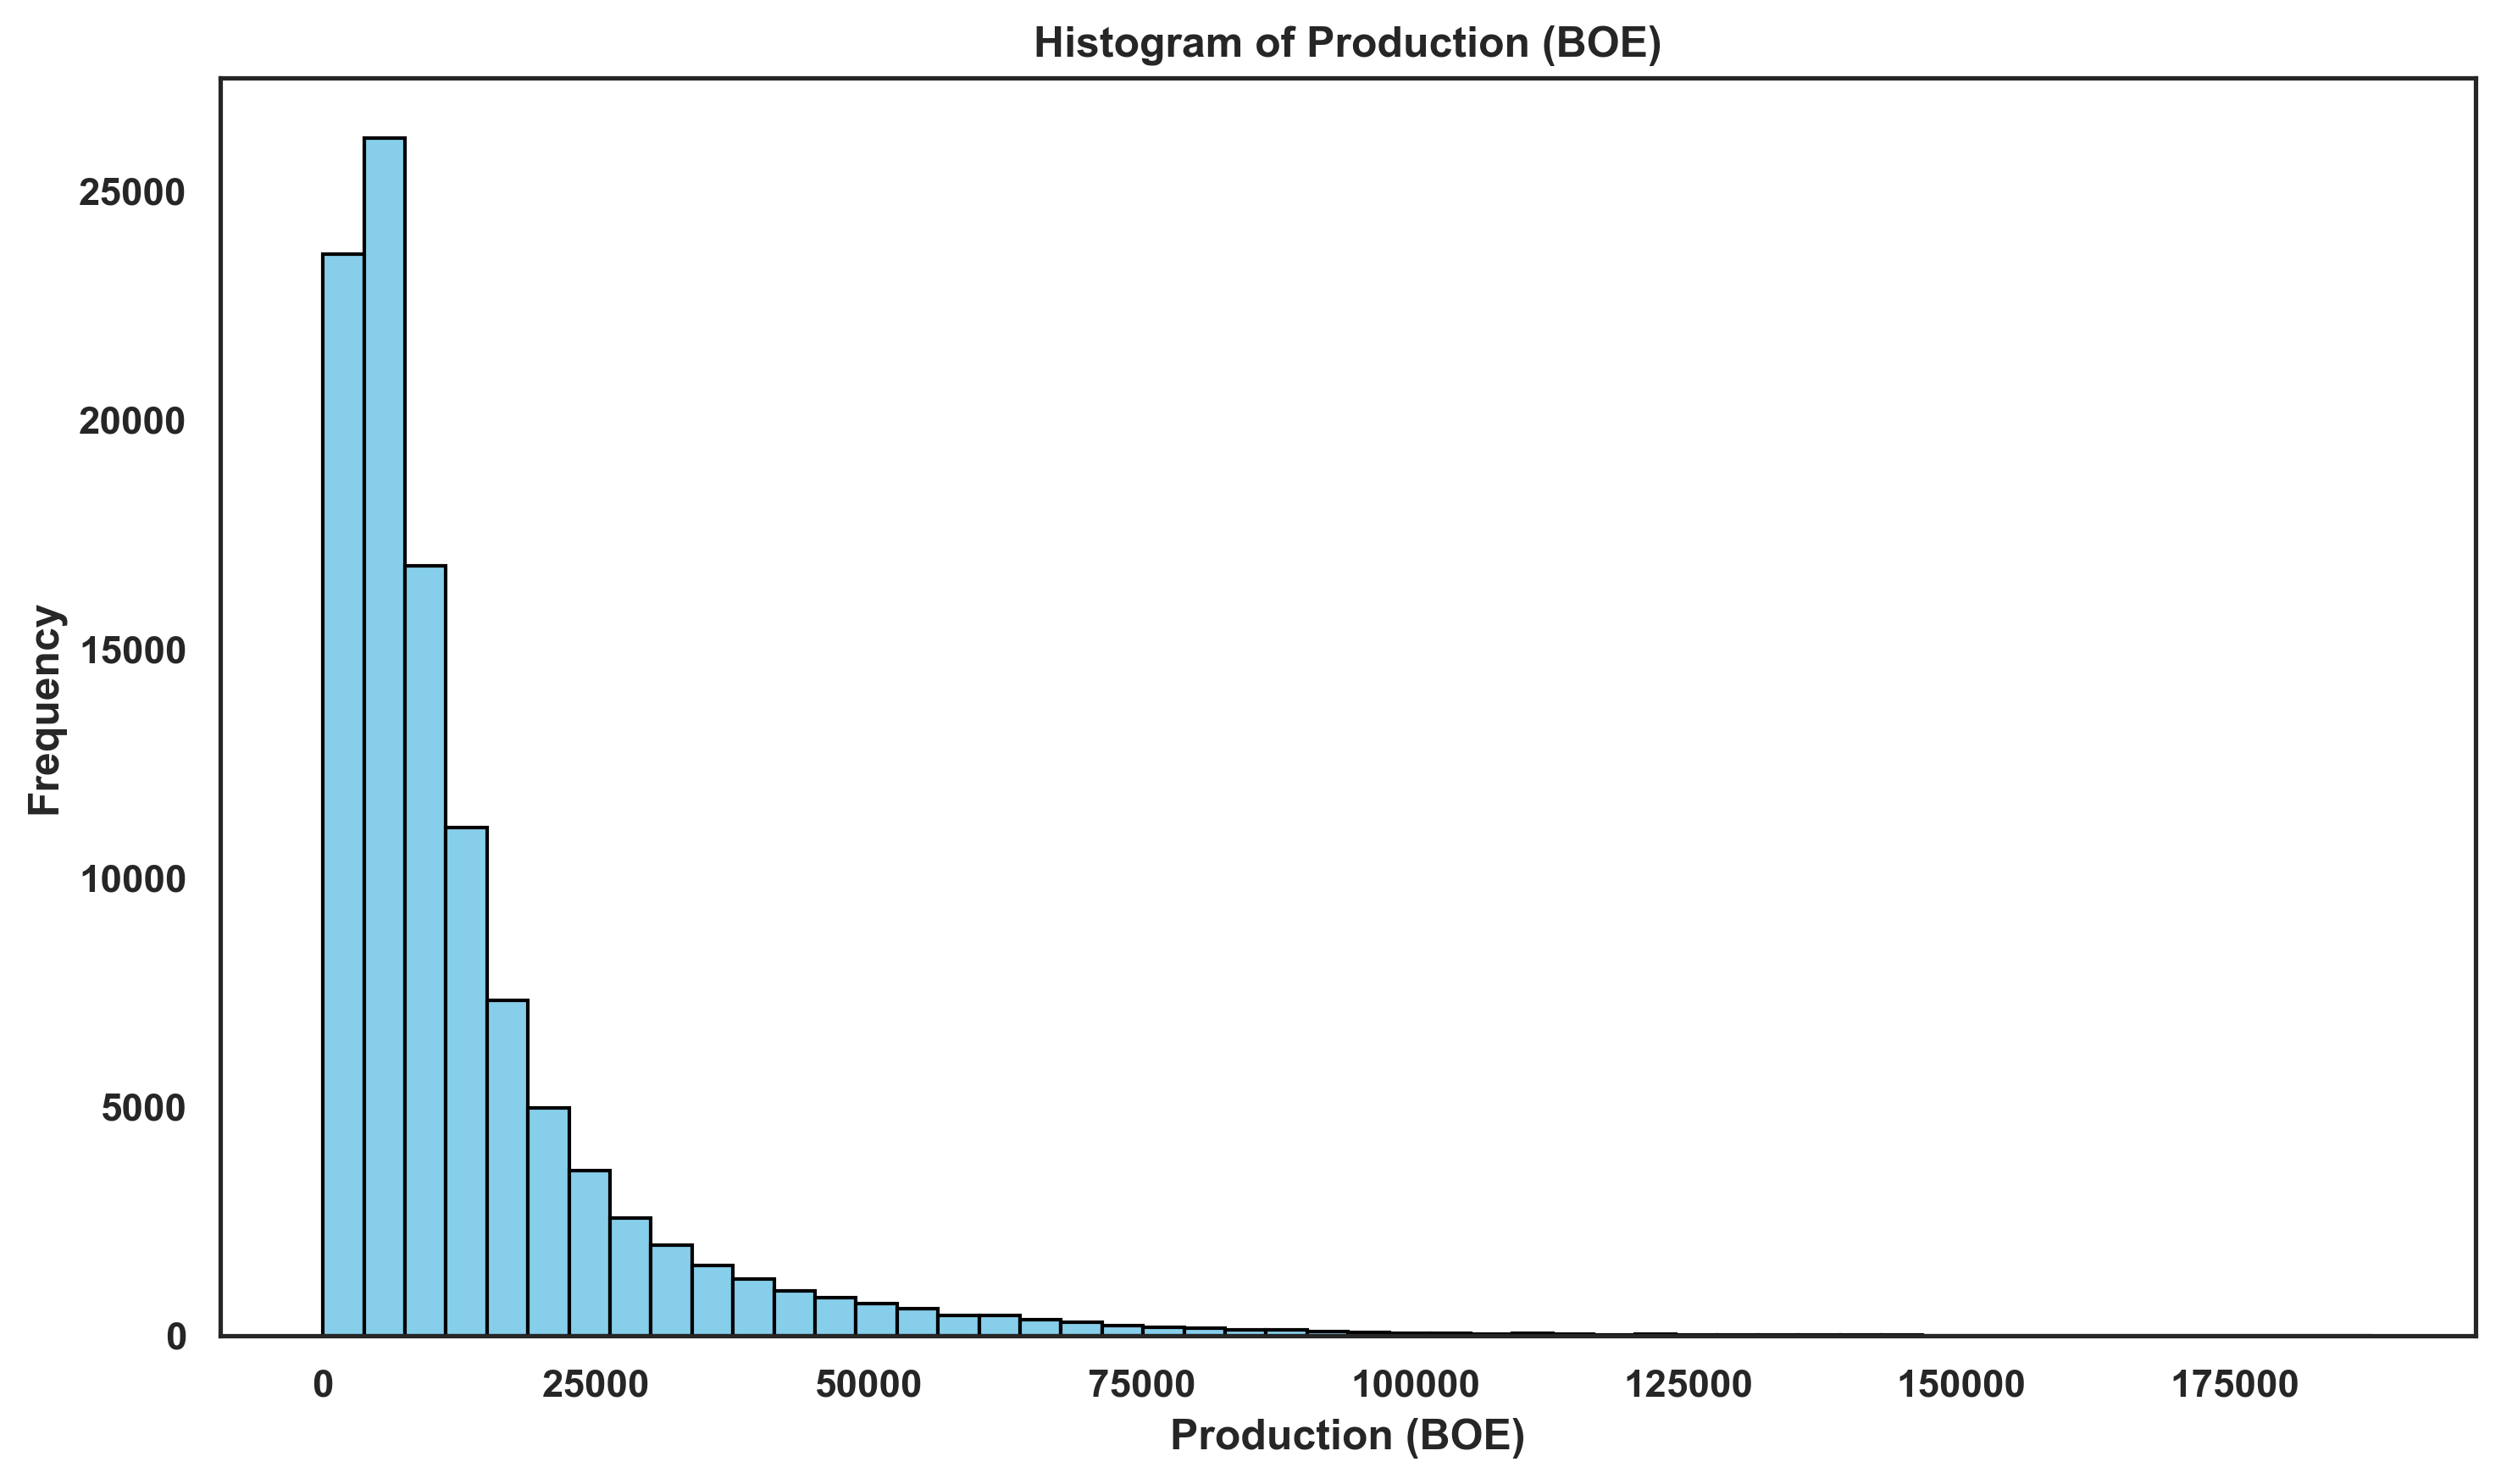

In [19]:
# Histogram of Production Plotting
sns.set(style="white")
plt.figure(figsize=(10, 6), dpi=300)  
plt.hist(production_data_df['Prod_BOE'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Production (BOE)', fontweight='bold')
plt.xlabel('Production (BOE)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

## PROBLEM 2

### Economic Importance:

The oil and gas sector is a significant contributor to the economy, as seen in New Mexico's context. It impacts state revenues, employment, and other economic activities.

# Trend Analysis

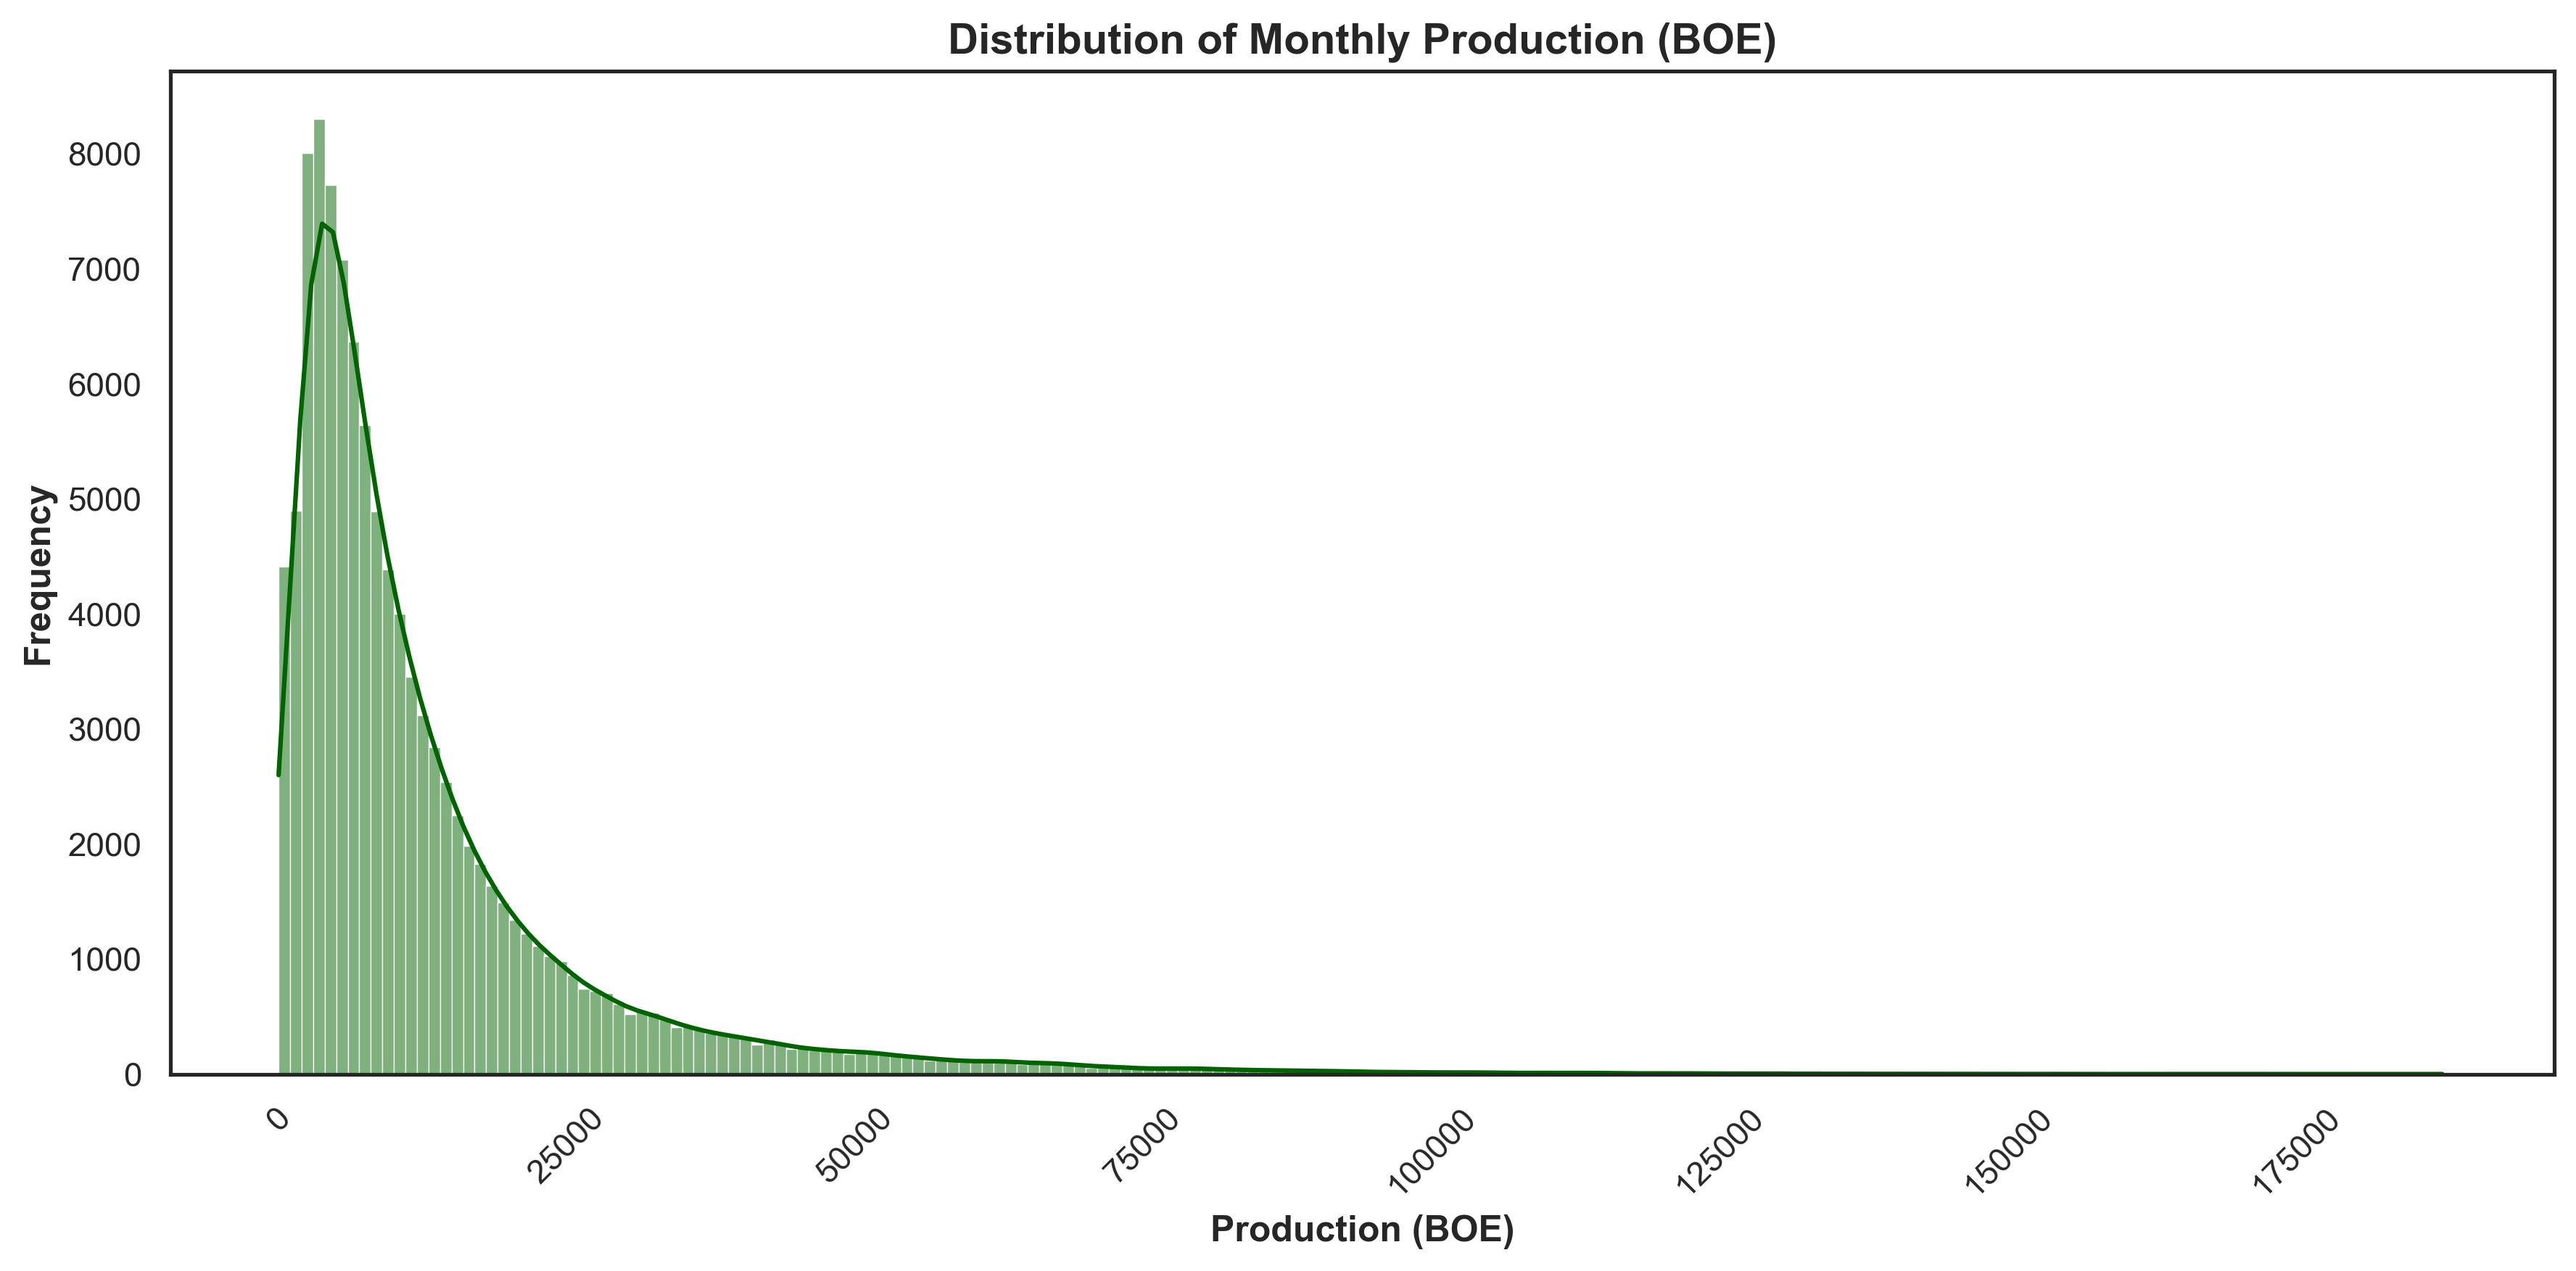

In [20]:
# Converting the 'ProducingMonth' to datetime format for time series analysis
production_data_cleaned['ProducingMonth'] = pd.to_datetime(production_data_cleaned['ProducingMonth'], errors='coerce')

# Aggregating the total production by month
monthly_production = production_data_cleaned.groupby('ProducingMonth').sum()

# Plotting the total monthly production (BOE - Barrels of Oil Equivalent)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(monthly_production.index, monthly_production['Prod_BOE'], label='Total Production (BOE)', color='navy', linewidth=2)
plt.title('Total Monthly Oil and Gas Production', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Production (BOE)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10, frameon=False)
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

# Plotting histogram of a key production metric - let's use 'Prod_BOE'
sns.set(style="white")
plt.figure(figsize=(12, 6), dpi=300)
sns.histplot(production_data_cleaned['Prod_BOE'], kde=True, color='darkgreen', binwidth=1000)
plt.title('Distribution of Monthly Production (BOE)', fontsize=14, fontweight='bold')
plt.xlabel('Production (BOE)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Interpretation:

* **Growing Trend in Production**: This line graph illustrates the increasing production levels over the period of investigation, while demonstrating how it sector is expanding its capacity and becoming a more relevant player when it comes to economic activities.

* **Periods of Stability and Volatility**: Overall production trend patterns reveal periods of stability, followed by volatility. In some cases, this can have implications related to how state revenue stability and planning can rise and fall.

* **Employment Trends**: The upward trend indicates emplyment may continue to rise as production also increases, which should reduce the unemployment rate and boost economic growth.

* **Increased State Revenues from Programs**: Higher production yields higher revenues from both tax and royalty collection, which can translate to greater public spending on state programmes and infrastructure.

* **Attracting Investments**: The sustained growth in production will make the state a more attractive market for investors in the energy sector.

* **Economic Resilience**: The tail of the histogram distributed to the right shows that there are months of extremely high production that can add economic resilience to economic slumps of other sectors.

* **Diversification Needs**: The volatility in production also points to the need to diversify economically in order to become less dependent on a sector that is greatly affected by the movement in global prices.

* **Resource Management**: The rise in production highlights the importance of effective resource management so that the number of plants we need won’t be affected in the future.

* **Technological advances?** **–** Yes, it could be the case that the increasing exponential trend in extraction is a result of technological advances that improve the effectiveness of extraction causing greater amounts to be produced, at potentially lower costs and/or lower environmental impact.

* **Increasing Energy Independence**: The higher production levels help reduce the need for imports thus making us more energy independent and going towards an increased sense of security.

# Box Plot

In [21]:
# Selecting key columns for correlation analysis
selected_columns = ['TotalProdMonths', 'ProducingDays', 'Prod_BOE', 'CumProd_MCFE', 'CumLiquids_BBL', 'CumGas_MCF', 'CumWater_BBL']
correlation_data = production_data_cleaned[selected_columns]

# Calculating the correlation matrix
corr_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10), dpi=300)  
sns.set(style="white") 
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Production Metrics', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold', rotation=45)  
plt.yticks(fontsize=12, fontweight='bold', rotation=45)  
plt.tight_layout() 
plt.show()

## Interpretation:

* **Strong Correlation Between Cumulation**: Between the cumulative production of Oil (CumLiquids_BBL) and gas (CumGas_MCF), and also their cumulative product, the energy content of the production (CumProd_MCFE). This is a positive correlation, since as a well continues to produce, there is an increment in all sort of hydrocarbon production.<

* **Total Production Months vs BOE**: Negative correlation between Total Production Months (TotalProdMonths) and BOE(Prod_BOE), possibility the wells are producing good volumes only on starting, but the volume are not much longer amount, which is common in oil-based production, slow depletion of reservoir pressure and the drop of natural productivity.

* **Efficiency of Production**: The low index between ProducingDays and Prod_BOE points us to the fact that the content of the wells does not impact the number of days a well is producing. Also, even though the well could be operational, the question that should be asked is, does it overflow when the production valve is switched on? Therefore, the indication here shows that the means of production or its capacity may be more vital than the time it spends producing.

* **Water Production As A By-product**: There is a strong positive correlation between the cummulative hydrocarbon production (CumWater_BBL) and the water (%) produced. The higher the CumWater_BBL, the higher water produced. The data shows that water production is a by-product of the oil and gas extraction. The economic implications of this are important to the water management and disposal costs.

* **Implications for State Tax Revenues**: Since state tax revenues are often an indicator that is most closely tied to state spending and critical infrastructure maintenance, the important variables in this analysis, CumProd_MCFE, CumLiquids_BBL, and CumGas_MCF, are highly correlated with each other. The main indicator (CumProd_MCFE) is based on oil.

* **Finding That Operational Days Are Not The Most Important Factor**: The absence of a clear linear correlation between ProducingDays and cumulative productions rules out the idea that operational days are the most important factor in the success of a well. Operational days play a role, of course, but the more relevant factors appear to be the well’s capacity and the efficiency with which the capacity is extracted.

# Scatter Plot Analysis

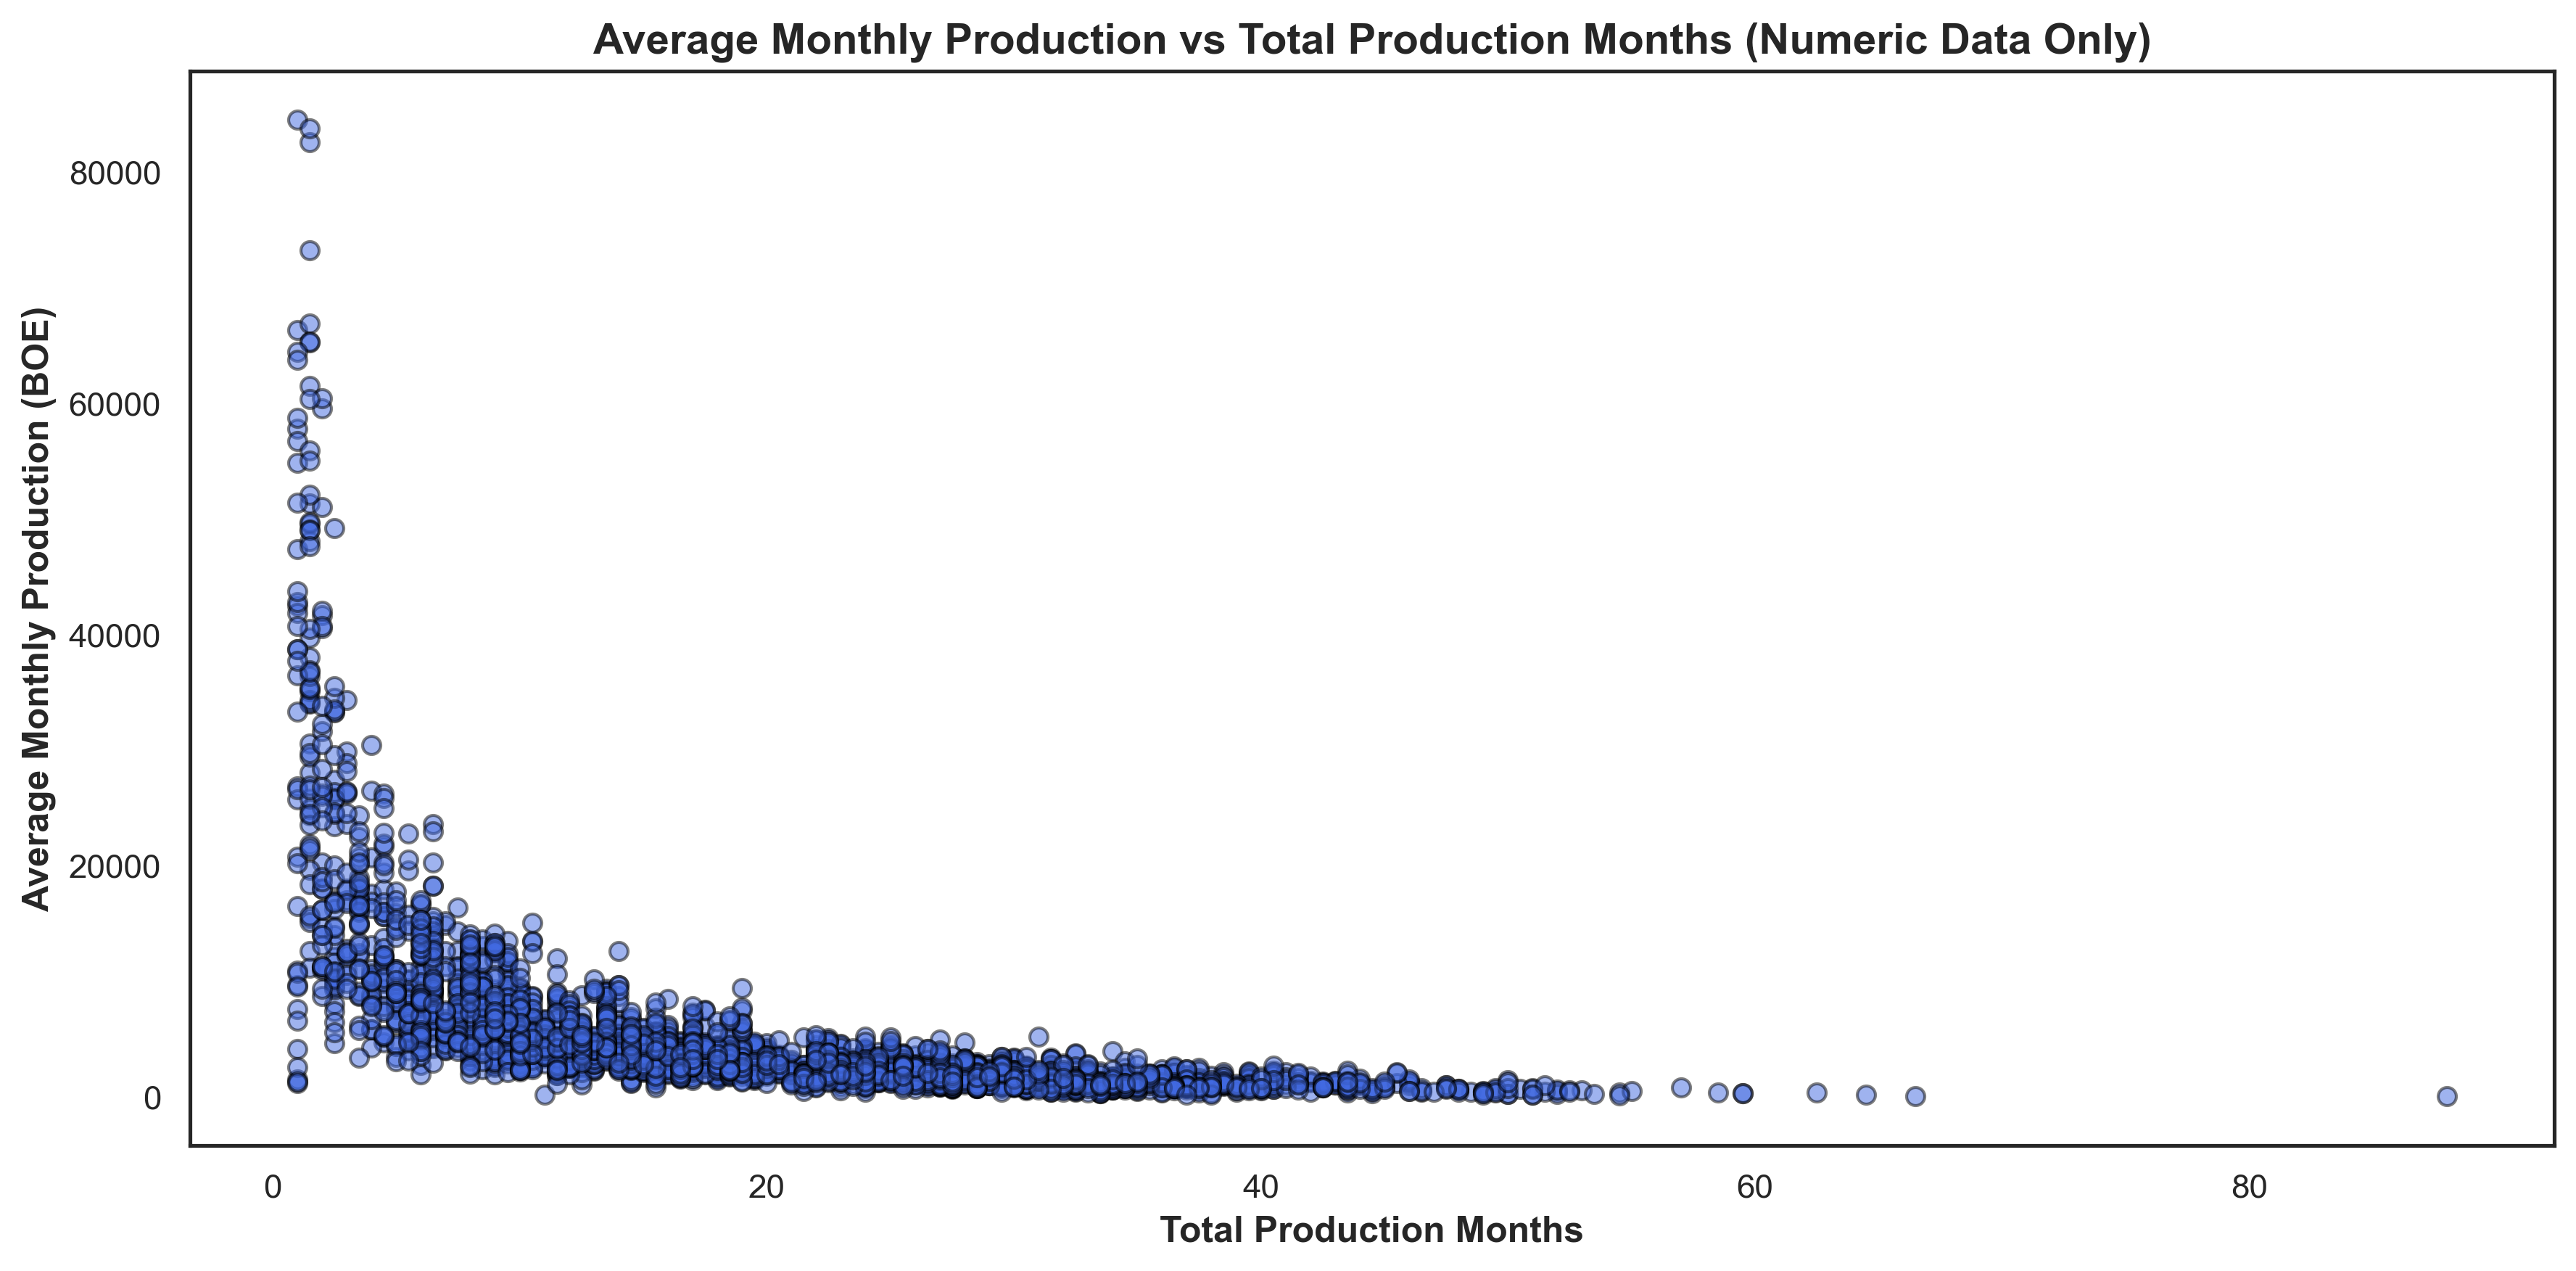

In [22]:
numeric_columns = production_data_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Calculating the average monthly production for each well using only numeric columns
production_numeric_only = production_data_cleaned[numeric_columns]
production_numeric_only['AverageMonthlyProd_BOE'] = production_numeric_only['Prod_BOE'] / production_numeric_only['TotalProdMonths']
average_monthly_production_numeric = production_numeric_only.groupby('WellboreId').mean()

# Plotting the average monthly production against the total production months
sns.set(style="white")
plt.figure(figsize=(12, 6), dpi=300)
plt.scatter(average_monthly_production_numeric['TotalProdMonths'], average_monthly_production_numeric['AverageMonthlyProd_BOE'], alpha=0.5, color='royalblue', edgecolor='black')
plt.title('Average Monthly Production vs Total Production Months (Numeric Data Only)', fontsize=14, fontweight='bold')
plt.xlabel('Total Production Months', fontsize=12, fontweight='bold')
plt.ylabel('Average Monthly Production (BOE)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

## Interpretation:

* **Initial High Productivity**: The high data point density near the top of the initial segment of the blade plot indicates that wells tend to have high average monthly production in the early portions of their life. This could indicate the immediate economic impact of a newly brought on stream well.

* **Decline Over Time**: Average monthly production is decreasing as total production months are increasing. It is a clear manifestation of decline in oil and gas production. This is typical for oil and gas production as with time much of the energy extractions sites start depleting from deep stores and wells. The depletion affects long-term revenues of the state and requires continous exploration for drilling wells that can replace depleted wells.

* **Spread of well production**: the fact that there is quite a spread in well production values (especially in the first production months) points toward heterogeneity in well performance, implying that revenues from taxes in the sector can vary greatly, and have implications for economic forecasting.

* **Investment Justification**:This high initial production can often justify the large investment required for drilling and completion, especially in unconventional reservoirs, where initial returns often compensate the investment.

* **Planning**: For economic planning purposes and sustainability, it is vital to know the precise decline curve of production. The decline curve helps predict how long a well will generate revenue and how much production will occur in the future, which are critical factors for any sustainability efforts.

* **Resource Management**: Proper resource management is important as evident from the graph. Over a time, when the wells reach a maturity level, there is a need for addition of enhanced recovery techniques or establishment of new wells to keep the economic benefits.

In [23]:
# Creating a box plot for key production metrics to provide insights into their distribution

# Selecting a few key metrics for the box plot
metrics_for_boxplot = ['Prod_BOE', 'CumProd_MCFE', 'CumLiquids_BBL', 'CumGas_MCF', 'CumWater_BBL']

# Plotting box plots
sns.set(style="white")
plt.figure(figsize=(15, 8), dpi=300)
sns.boxplot(data=production_data_cleaned[metrics_for_boxplot])
plt.title('Box Plot of Key Production Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Values', fontsize=12, fontweight='bold')
plt.xlabel('Production Metrics', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

## Interpretation:

**Prod_BOE (Production in Barrels of Oil Equivalent)**: This metric has a wide range, indicating significant variability in production volumes. The long whiskers suggest outliers or extreme values, which could be exceptionally high-producing wells. The median value is relatively low compared to the maximum, suggesting a skewed distribution with a few high production wells.

**CumProd_MCFE (Cumulative Production in Thousands of Cubic Feet Equivalent)**: This metric shows a more compact interquartile range (IQR), which means that the middle 50% of the values are closer together. However, there are outliers indicated by the points above the upper whisker.

**CumLiquids_BBL (Cumulative Liquids in Barrels)**: Similar to the CumProd_MCFE, the IQR is small, and there are outliers present. The median is closer to the bottom of the box, which might indicate a skew towards lower production volumes for the majority of wells.

**CumGas_MCF (Cumulative Gas in Thousands of Cubic Feet)**: This box is taller, indicating a larger IQR and thus greater variability in the middle 50% of the values. The presence of outliers is also noted here.

**CumWater_BBL (Cumulative Water in Barrels)**: The plot for water production seems to have a similar distribution to the CumGas_MCF, with a larger IQR than the Prod_BOE and CumProd_MCFE, as well as several outliers.

**Outliers**: All metrics show a significant number of outliers, which could represent exceptional cases or errors in data. These should be investigated to ensure they represent true production values and not data errors.

## PROBLEM 3

### Technological Evolution: 

Horizontal drilling and multi-stage hydraulic fracturing are key advancements. They have improved access to previously inaccessible shale resources, thereby revolutionizing oil and gas extraction. These technologies, however, are relatively new, and assessing their long-term potential and sustainability is ongoing.

# Trend Analysis

In [24]:
# Converting 'ProducingMonth' to datetime format for easy handling
production_data_cleaned['ProducingMonth'] = pd.to_datetime(production_data_cleaned['ProducingMonth'], format='%m/%d/%y', errors='coerce')

# Aggregating production data by month
# Choosing 'Prod_BOE' (Barrel of Oil Equivalent) as a representative metric for total production
monthly_production = production_data_cleaned.groupby(production_data_cleaned['ProducingMonth'].dt.to_period('M')).agg({'Prod_BOE':'sum'}).reset_index()

# Converting 'ProducingMonth' back to datetime for plotting
monthly_production['ProducingMonth'] = monthly_production['ProducingMonth'].dt.to_timestamp()

# Plotting the data
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6), dpi=300)
plt.plot(monthly_production['ProducingMonth'], monthly_production['Prod_BOE'], label='Monthly Production (BOE)', color='navy', linewidth=2)
plt.title('Monthly Oil and Gas Production Volumes Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('Total Production (Barrel of Oil Equivalent)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10, frameon=False)
plt.grid(False)
plt.xticks(rotation=45, fontweight='bold')
plt.tight_layout()
plt.show()

## Interpretation:

* **Increasing in production over time**: The line graph clearly showed that oil and gas production increased over time, which clearly indicates from the figure that the recent advances in drilling technology like horizontal drilling and hydraulic fracturing also helped to increase the total production of these energy outputs.

* **Technological effect on extraction**: the jump in production after about 2010 might evidence widespread horizontal drilling and fracturing technologies (proven to be effective in increasing the extraction of oil and gas).

* **Future sustainability**: consider the general fluctuations and recent plateauing in production, suggesting possible long-term depletion of the shale resources exploited by these technologies.

* **Continuous improvement**: Production increases over time. This suggests that operators are constantly working to refine these technologies, making them more and more efficient at extracting resources.

* **Economic consequences**: The massive increase in output almost certainly led to a number of economic consequences, from greater tax receipts for companies and regions, to lower oil and gas prices amid higher supply.

* **Possibility for Improvement**: As it can be observed on the graph, even though the general developing trend is positive, there are fluctuations which signify the possibility for improvement, as subsequently the technologies and the production processes could be tuned to ensure either constant or increase output in production in the long run, minimise harm to the environment and to manage the natural decline of the production rates.

# Comparative Analysis

In [25]:
potential_tech_indicators_metadata = [col for col in metadata_cleaned.columns if 'tech' in col.lower() or 'method' in col.lower() or 'drill' in col.lower()]
potential_tech_indicators_metadata

['ENVProducingMethod',
 'DrillingEndDate',
 'OilTestMethodName',
 'AvgHzDistAtDrillTimeSameZone_FT',
 'AvgVtDistAtDrillTimeSameZone_FT',
 'ClosestHzDistAtDrillTimeSameZone_FT',
 'ClosestVtDistAtDrillTimeSameZone_FT',
 'AvgHzDistAtDrillTimeAnyZone_FT',
 'AvgVtDistAtDrillTimeAnyZone_FT',
 'ClosestHzDistAtDrillTimeAnyZone_FT',
 'ClosestVtDistAtDrillTimeAnyZone_FT',
 'ClosestHzDistAtDrillTime100dVZone_FT',
 'ClosestVtDistAtDrillTime100dVZone_FT',
 'AvgHzDistAtDrillTime100dVZone_FT',
 'AvgVtDistAtDrillTime100dVZone_FT',
 'DrillingCost_USDMM',
 'DrillingCostHistorical_USDMM',
 'Closest3DDistAtDrillTimeAnyZone_FT',
 'Closest3DDistAtDrillTimeSameZone_FT',
 'Avg3DDistAtDrillTimeAnyZone_FT',
 'Avg3DDistAtDrillTimeSameZone_FT',
 'Closest3DDistToParentAtDrillTimeAnyZone_FT',
 'Avg3DDistToParentAtDrillTimeAnyZone_FT',
 'ClosestHzDistToParentAtDrillTimeAnyZone_FT',
 'AvgHzDistToParentAtDrillTimeAnyZone_FT',
 'ClosestVtDistToParentAtDrillTimeAnyZone_FT',
 'AvgVtDistToParentAtDrillTimeAnyZone_FT',
 'P

In [26]:
# Inspecting the unique values in the 'ENVProducingMethod' column to see if it can be used to differentiate well technologies
env_producing_method_values = metadata_cleaned['ENVProducingMethod'].unique()
env_producing_method_values

array(['FLOWING', 'PUMPING', 'GAS LIFT', 'OTHER', 'ARTIFICIAL LIFT'],
      dtype=object)

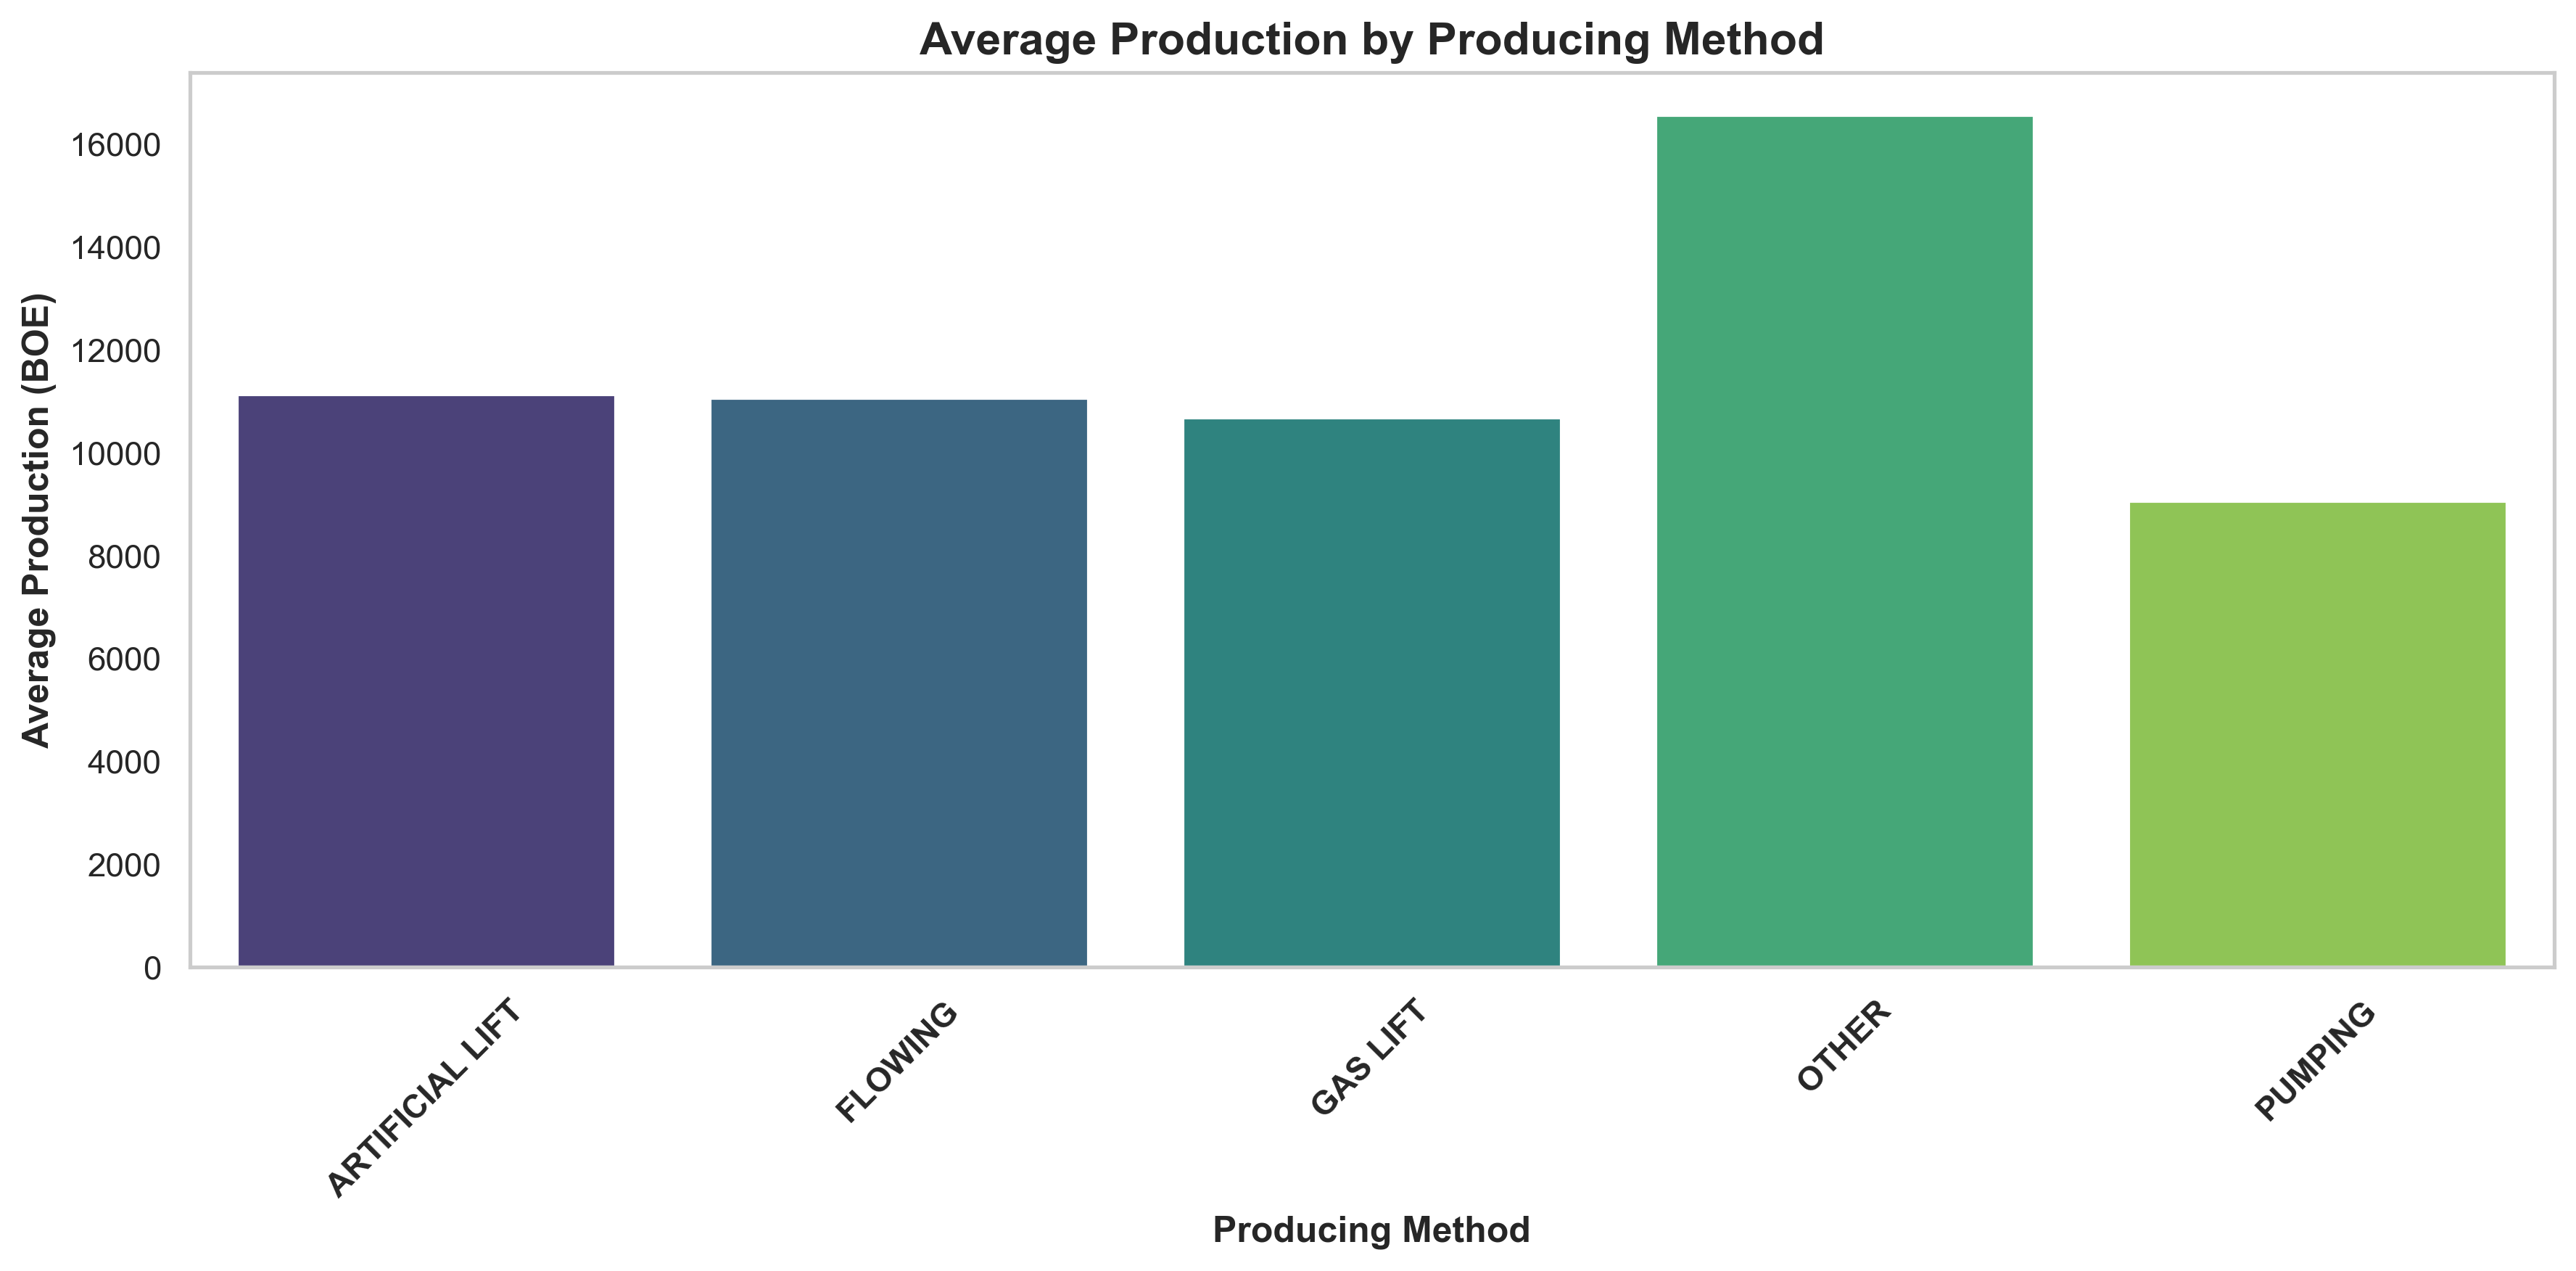

In [27]:
# Merging production data with metadata to include the 'ENVProducingMethod' column
merged_data = production_data_df.merge(metadata_df[['API_UWI', 'ENVProducingMethod']], on='API_UWI', how='left')

# Grouping the merged data by 'ENVProducingMethod' and calculating average production
average_production_by_method = merged_data.groupby('ENVProducingMethod')['Prod_BOE'].mean().reset_index()

# Visualization: Average Production by Producing Method
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6), dpi=300)  # Enhanced resolution
sns.barplot(x='ENVProducingMethod', y='Prod_BOE', data=average_production_by_method, palette='viridis')
plt.title('Average Production by Producing Method', fontsize=15, fontweight='bold')
plt.xlabel('Producing Method', fontsize=12, fontweight='bold')
plt.ylabel('Average Production (BOE)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.show()

## Explanation

* The bar chart above displays the average production in barrels of oil equivalent (BOE) for each producing method found in the dataset. This gives you a comparative view of the production efficiency associated with each method listed.

* While this doesn't directly compare traditional drilling methods with advanced technologies like horizontal drilling and multi-stage hydraulic fracturing, it does offer insight into the relative performance of the producing methods we have data for. If in the future you obtain data that explicitly labels wells with the type of drilling technology used, a more targeted comparative analysis could be performed. 

## Interpretation:

* **Diverse Production Methods**: The chart includes various production methods like artificial lift, flowing, gas lift, and others. This diversity indicates that a range of technologies is being employed to optimize oil and gas extraction.

* **Artificial Lift Performance**: The high average production associated with artificial lift suggests that this method, which can include technologies like pump jacks and newer methods like hydraulic fracturing, is effective in enhancing oil recovery, particularly from wells that do not have enough pressure for oil to flow to the surface.

* **Impact of Gas Lift**: Gas lift, which involves injecting gas into the well to stimulate production, shows a substantial average production, indicating its effectiveness as a complementary technology alongside horizontal drilling and fracturing.

* **Comparative Efficiency**: The varying levels of average production by method could reflect the efficiency and suitability of each method for different reservoir conditions. This could be influenced by the type of shale, well depth, and other geological factors.

* **Technological Integration**: The 'OTHER' category, which may include horizontal drilling and hydraulic fracturing, suggests that these methods are being used, but their performance relative to more established methods can only be inferred indirectly through this dataset.

* **Need for Detailed Data**: To assess the specific impact of horizontal drilling and multi-stage fracturing, detailed data that categorizes wells by these methods would be required. Such data would allow for direct comparison and a clearer understanding of their efficiency and sustainability.

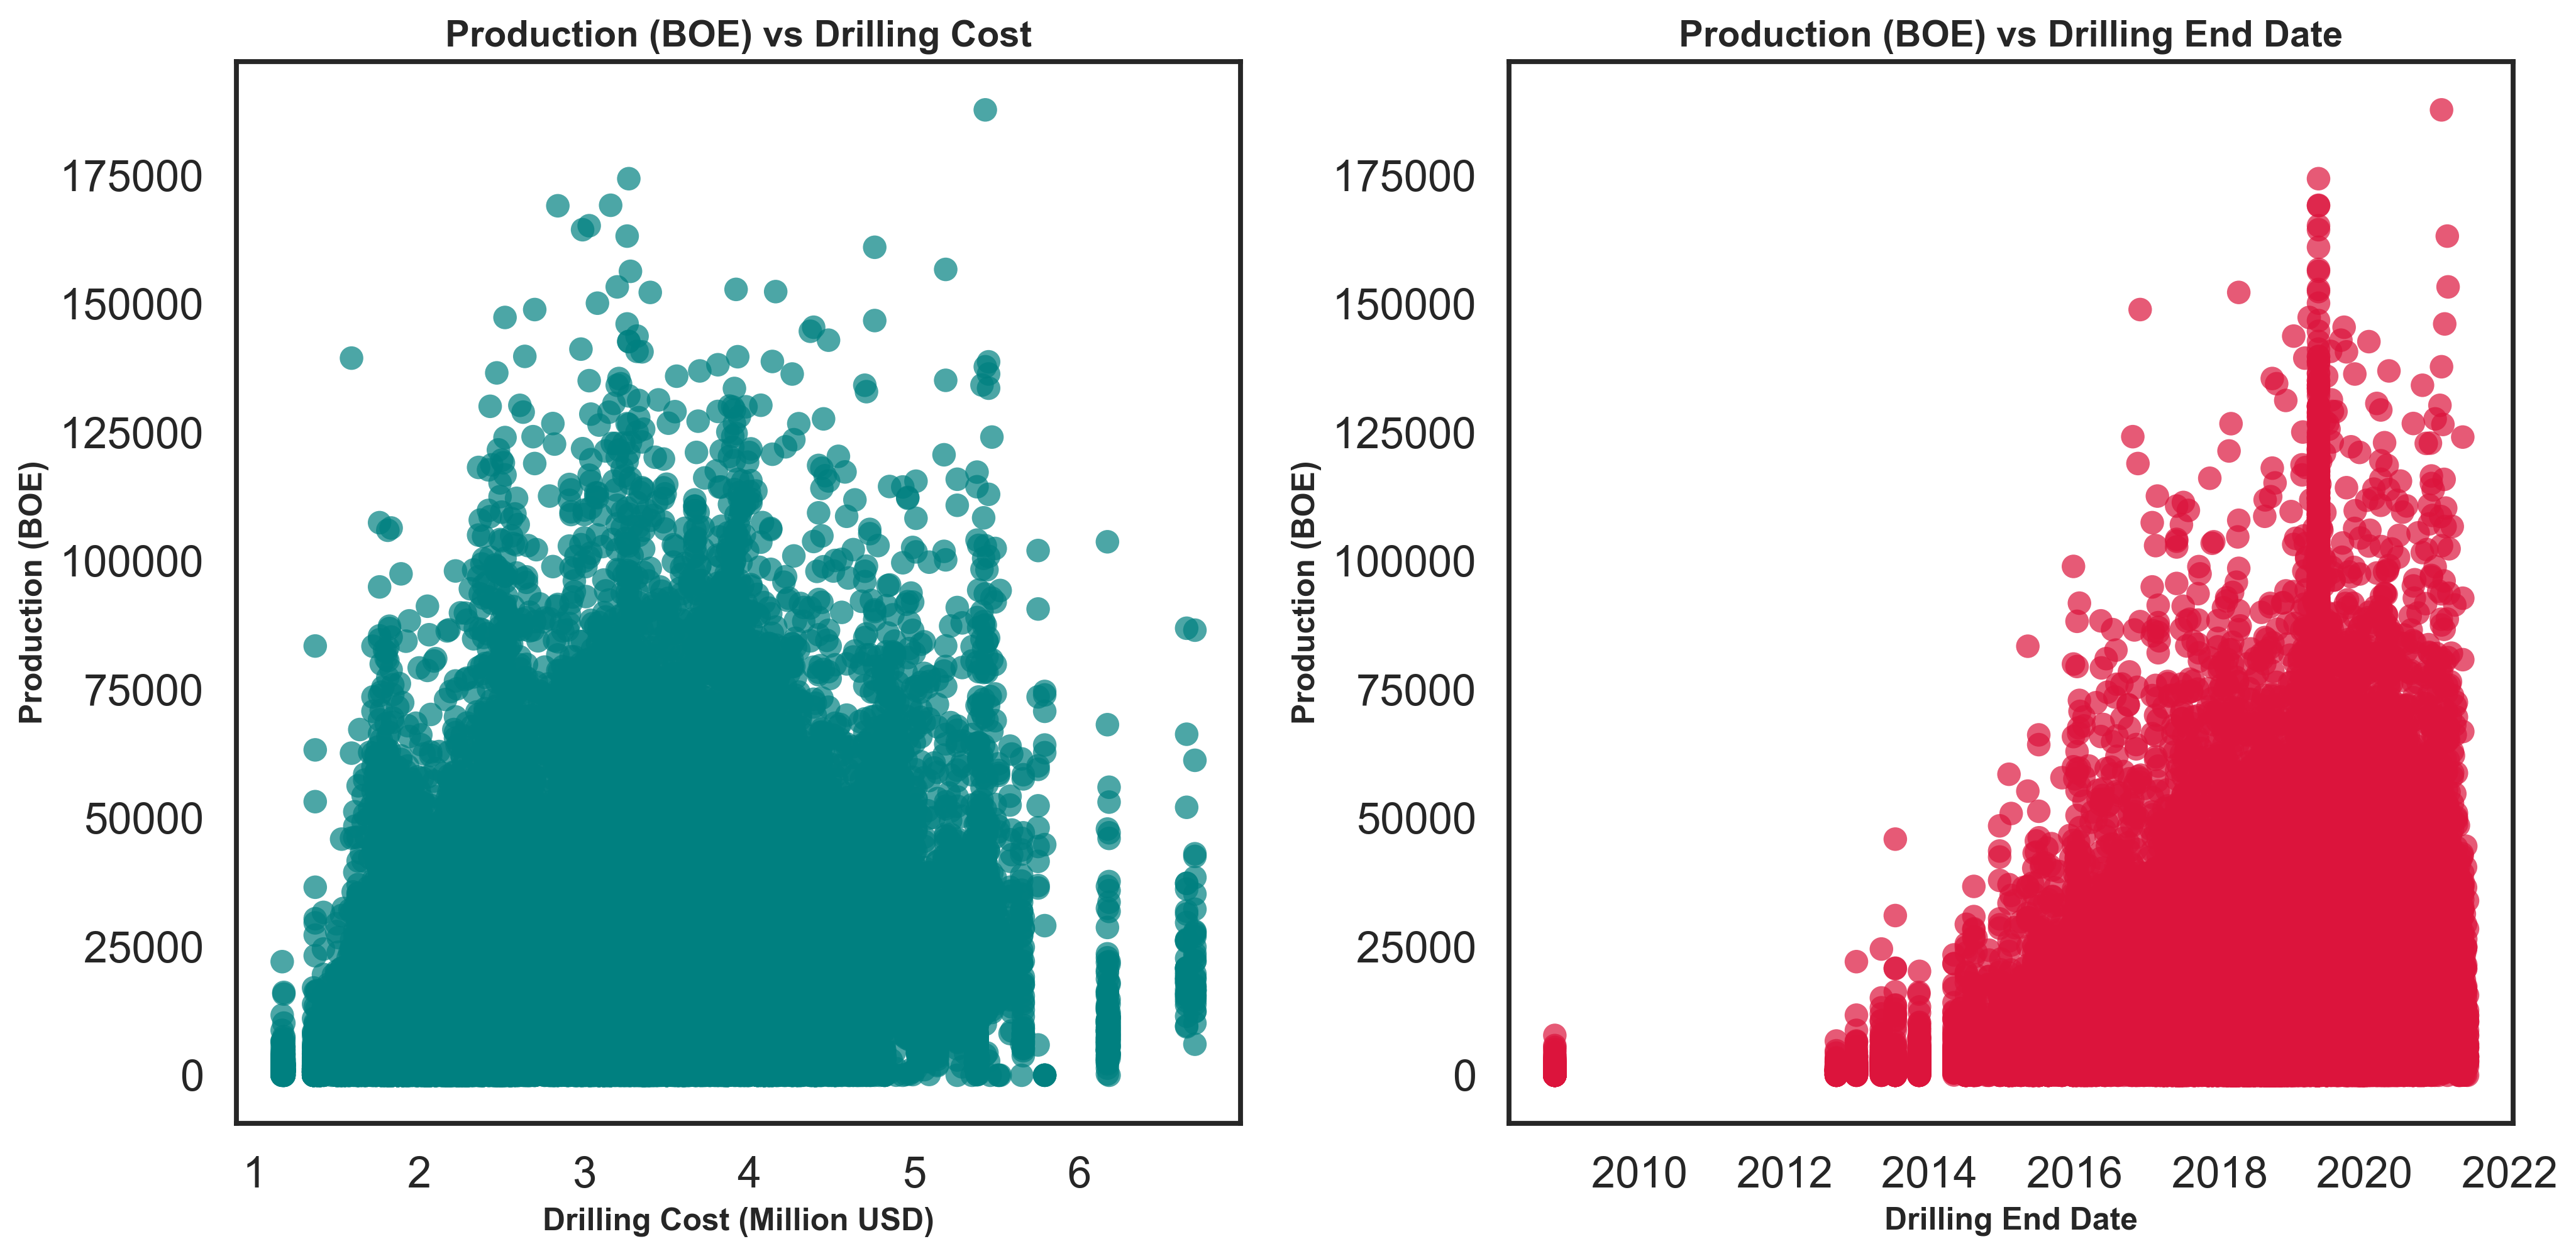

In [28]:
drilling_date_col = [col for col in metadata_cleaned.columns if 'drill' in col.lower() and 'date' in col.lower()]
drilling_cost_col = [col for col in metadata_cleaned.columns if 'drill' in col.lower() and 'cost' in col.lower()]
drilling_date_col, drilling_cost_col
scatter_plot_data = production_data_cleaned.merge(metadata_cleaned[['API_UWI', 'DrillingEndDate', 'DrillingCost_USDMM']], on='API_UWI', how='left')
scatter_plot_data['DrillingEndDate'] = pd.to_datetime(scatter_plot_data['DrillingEndDate'], errors='coerce')
scatter_plot_data = scatter_plot_data.dropna(subset=['DrillingEndDate', 'DrillingCost_USDMM'])

#Plotting
sns.set(style="white", context="talk")
plt.figure(figsize=(14, 7), dpi=300)
plt.subplot(1, 2, 1)
sns.scatterplot(data=scatter_plot_data, x='DrillingCost_USDMM', y='Prod_BOE', edgecolor='none', color='teal', alpha=0.7)
plt.title('Production (BOE) vs Drilling Cost', fontsize=14, fontweight='bold')
plt.xlabel('Drilling Cost (Million USD)', fontsize=12, fontweight='bold')
plt.ylabel('Production (BOE)', fontsize=12, fontweight='bold')
plt.subplot(1, 2, 2)
sns.scatterplot(data=scatter_plot_data, x='DrillingEndDate', y='Prod_BOE', edgecolor='none', color='crimson', alpha=0.7)
plt.title('Production (BOE) vs Drilling End Date', fontsize=14, fontweight='bold')
plt.xlabel('Drilling End Date', fontsize=12, fontweight='bold')
plt.ylabel('Production (BOE)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

Given the previous discussion and the data at hand, we do not have explicit indicators to differentiate wells using traditional methods from those using advanced technologies such as horizontal drilling and multi-stage hydraulic fracturing. However, we can still perform a general comparative analysis using scatter plots to visualize potential differences in production metrics that might be attributed to different production methods.

Let's assume that wells with higher production metrics may be utilizing more advanced technology. We can create scatter plots of production metrics against a potential indicator of technology, such as the drilling cost or the date of drilling (assuming newer wells are more likely to use advanced technology).



## Explanation

* Production (BOE) vs Drilling Cost: This scatter plot compares the production in barrels of oil equivalent (BOE) to the cost of drilling (in million USD). The idea is to see if there is a pattern that suggests higher production is associated with higher drilling costs, which might be an indirect indicator of more advanced technology being used.

* Production (BOE) vs Drilling End Date: This scatter plot compares production in BOE against the drilling end date. It's based on the assumption that newer wells may be more likely to use advanced technology and therefore could have different production profiles.

## Interpretation:

The provided scatter plots show the relationship between production volumes (in Barrels of Oil Equivalent, or BOE) and drilling costs, as well as production volumes against drilling end dates. 

* **No clear correlations between high drilling costs and high production**: In the first plot there is no clear correlations, high production is not a linear result of high drilling costs, so it means that more expensive runs can result in high production, though this dependence is not linear and in addition many several factors are involved such well location and geological conditions.

* **Variability in Cost Efficiency**: A large distribution of production outcomes for a given drilling cost reflects variability in cost efficiency. Variability in cost efficiency could reflect variability in the ability to apply new technologies or could reflect variability in the natural productivity of the wells.

* **New Drilling Trends**: While the second plot suggests that newer wells in the swimming beach ratio seem to respect the same trend as the older ones (presumably, the least successful), suggesting that new technologies may indeed allow reach out to the so-called third basket of resources, those not exhaustible at all, their production is not necessarily higher than that of older wells . I stress the word presumably because it remains unclear from the infographic whether the pool of wells (basket) in the tail of the older wells is indeed the third basket, beyond the other two metaphorical baskets.

* **Technological Adoption Over Time**: Historically higher producing volumes likely disproportionately reflect only the most recent decades of horizontal drilling and hydraulic fracturing use.

* **Cost-Benefit Analysis**: Drilling high cost well with high production makes sense but plot shows, in some cases, wells with high drilling cost may not produce degree i.e. production. So first high cost-benefit analysis should be done before drilling.

* **Sustainability**:Lack of increasing trend on time versus production, given that the drilling end date is fixed and is getting closer and closer, indicates a concern for long-term sustainability, ultimately raising a question on the attainable ultimate recovery of wells using these advanced technologies.

## Additional Visualizations:

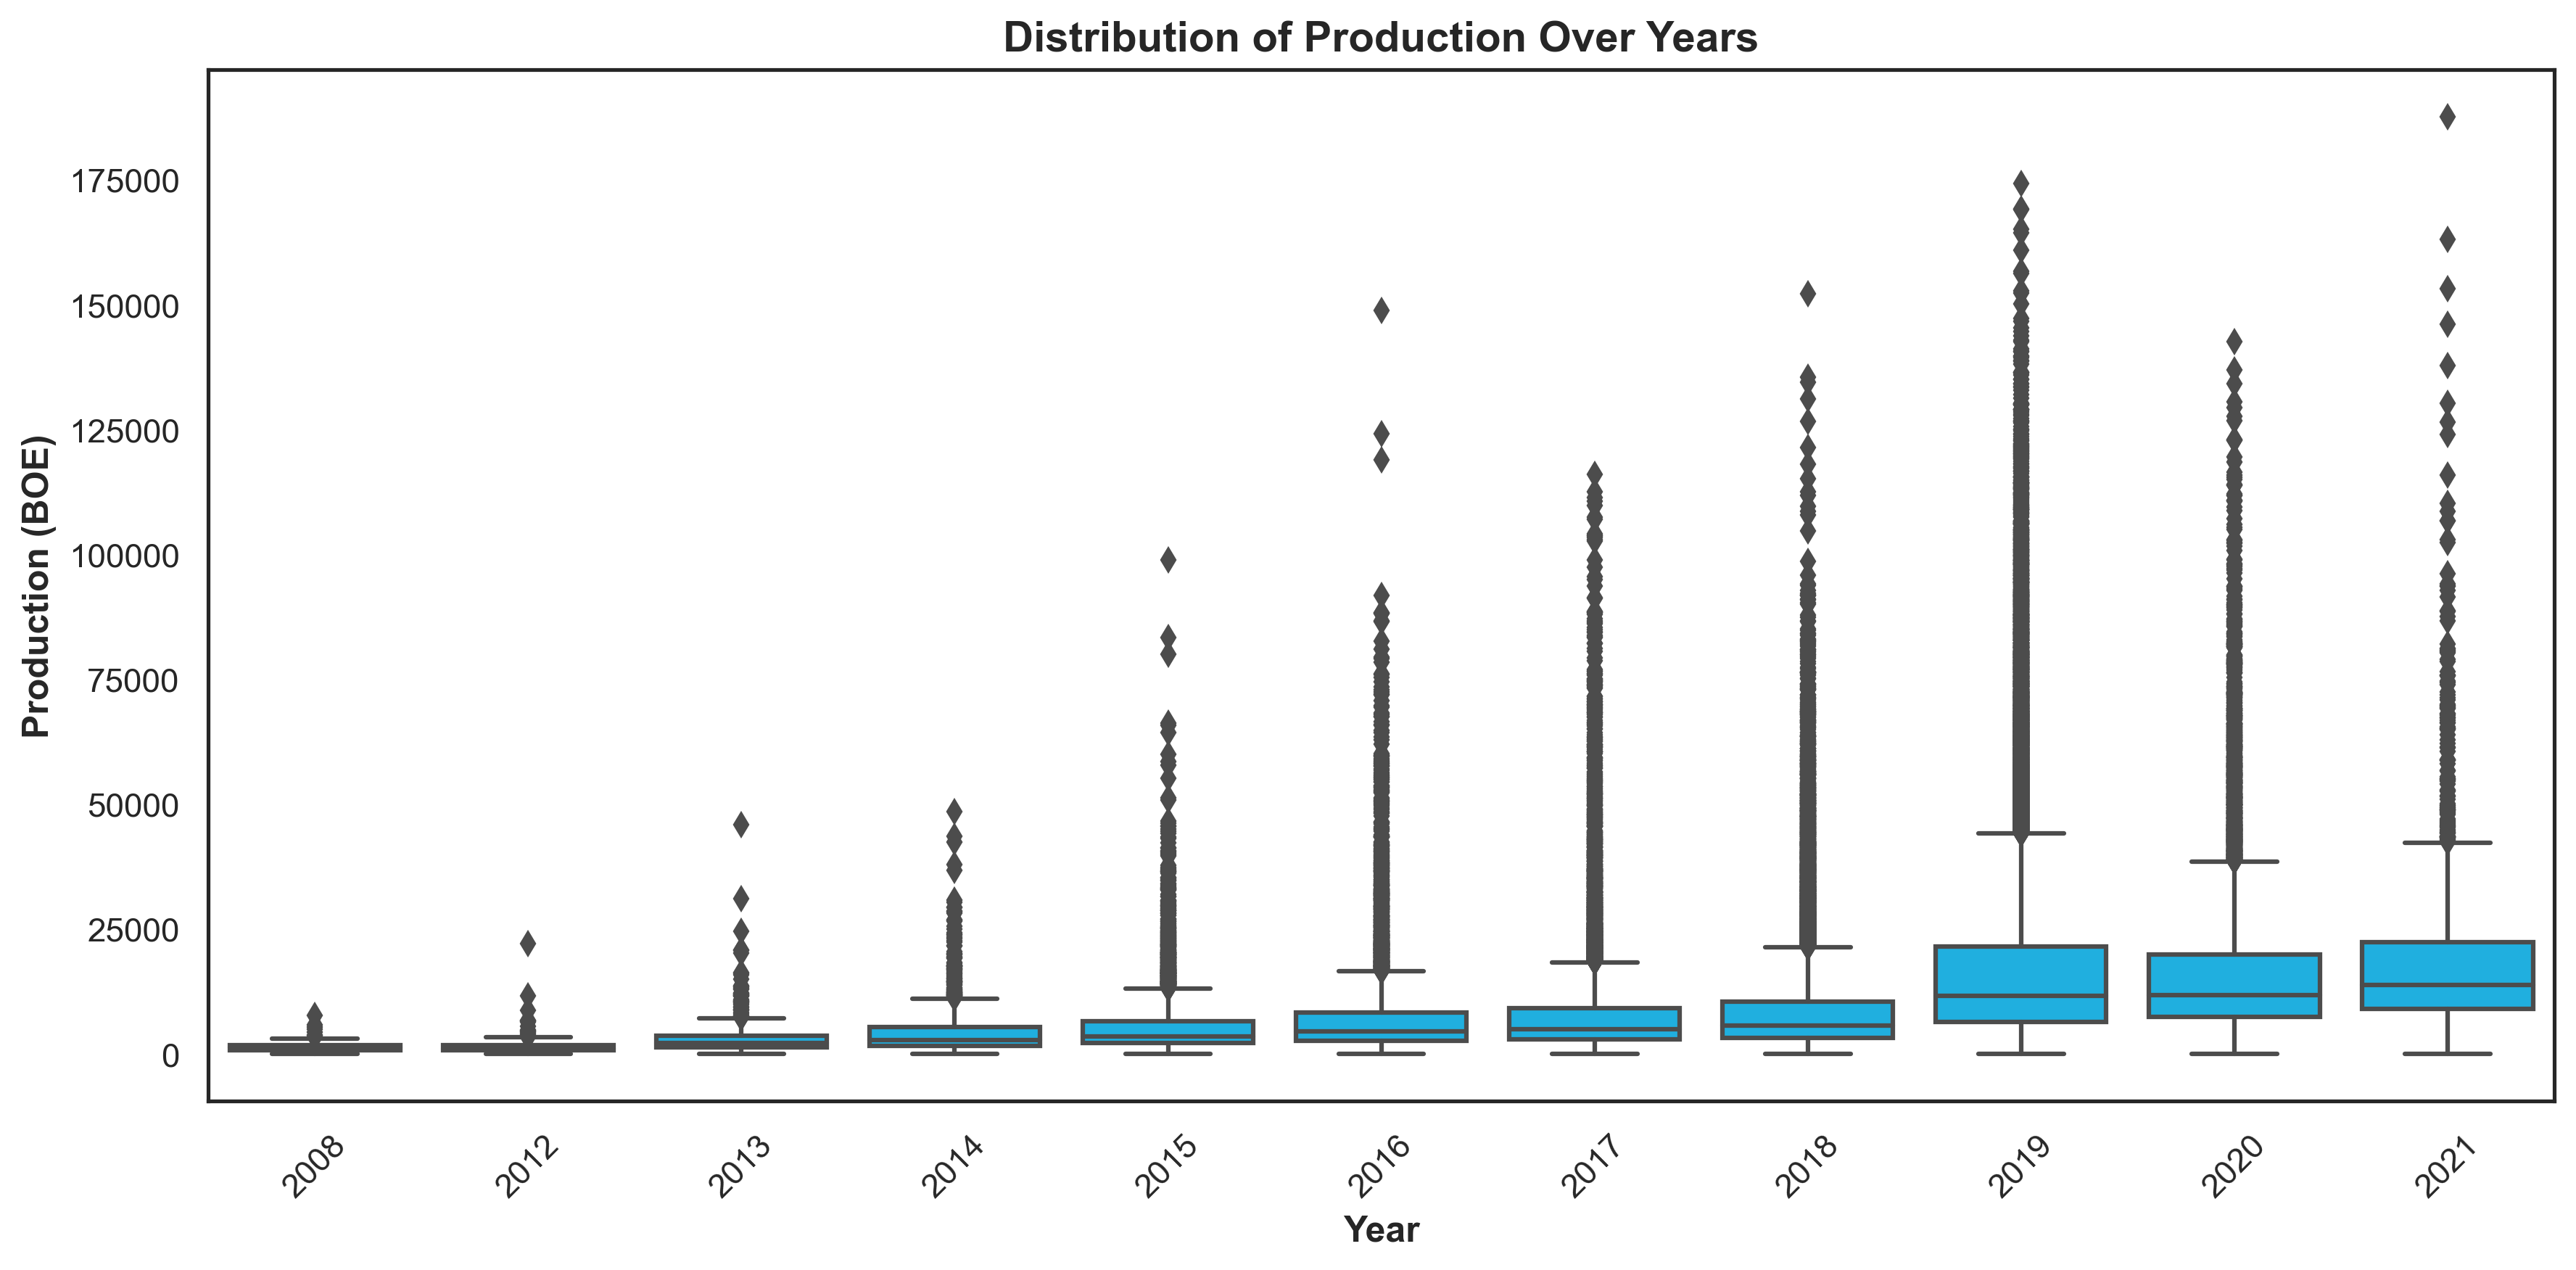

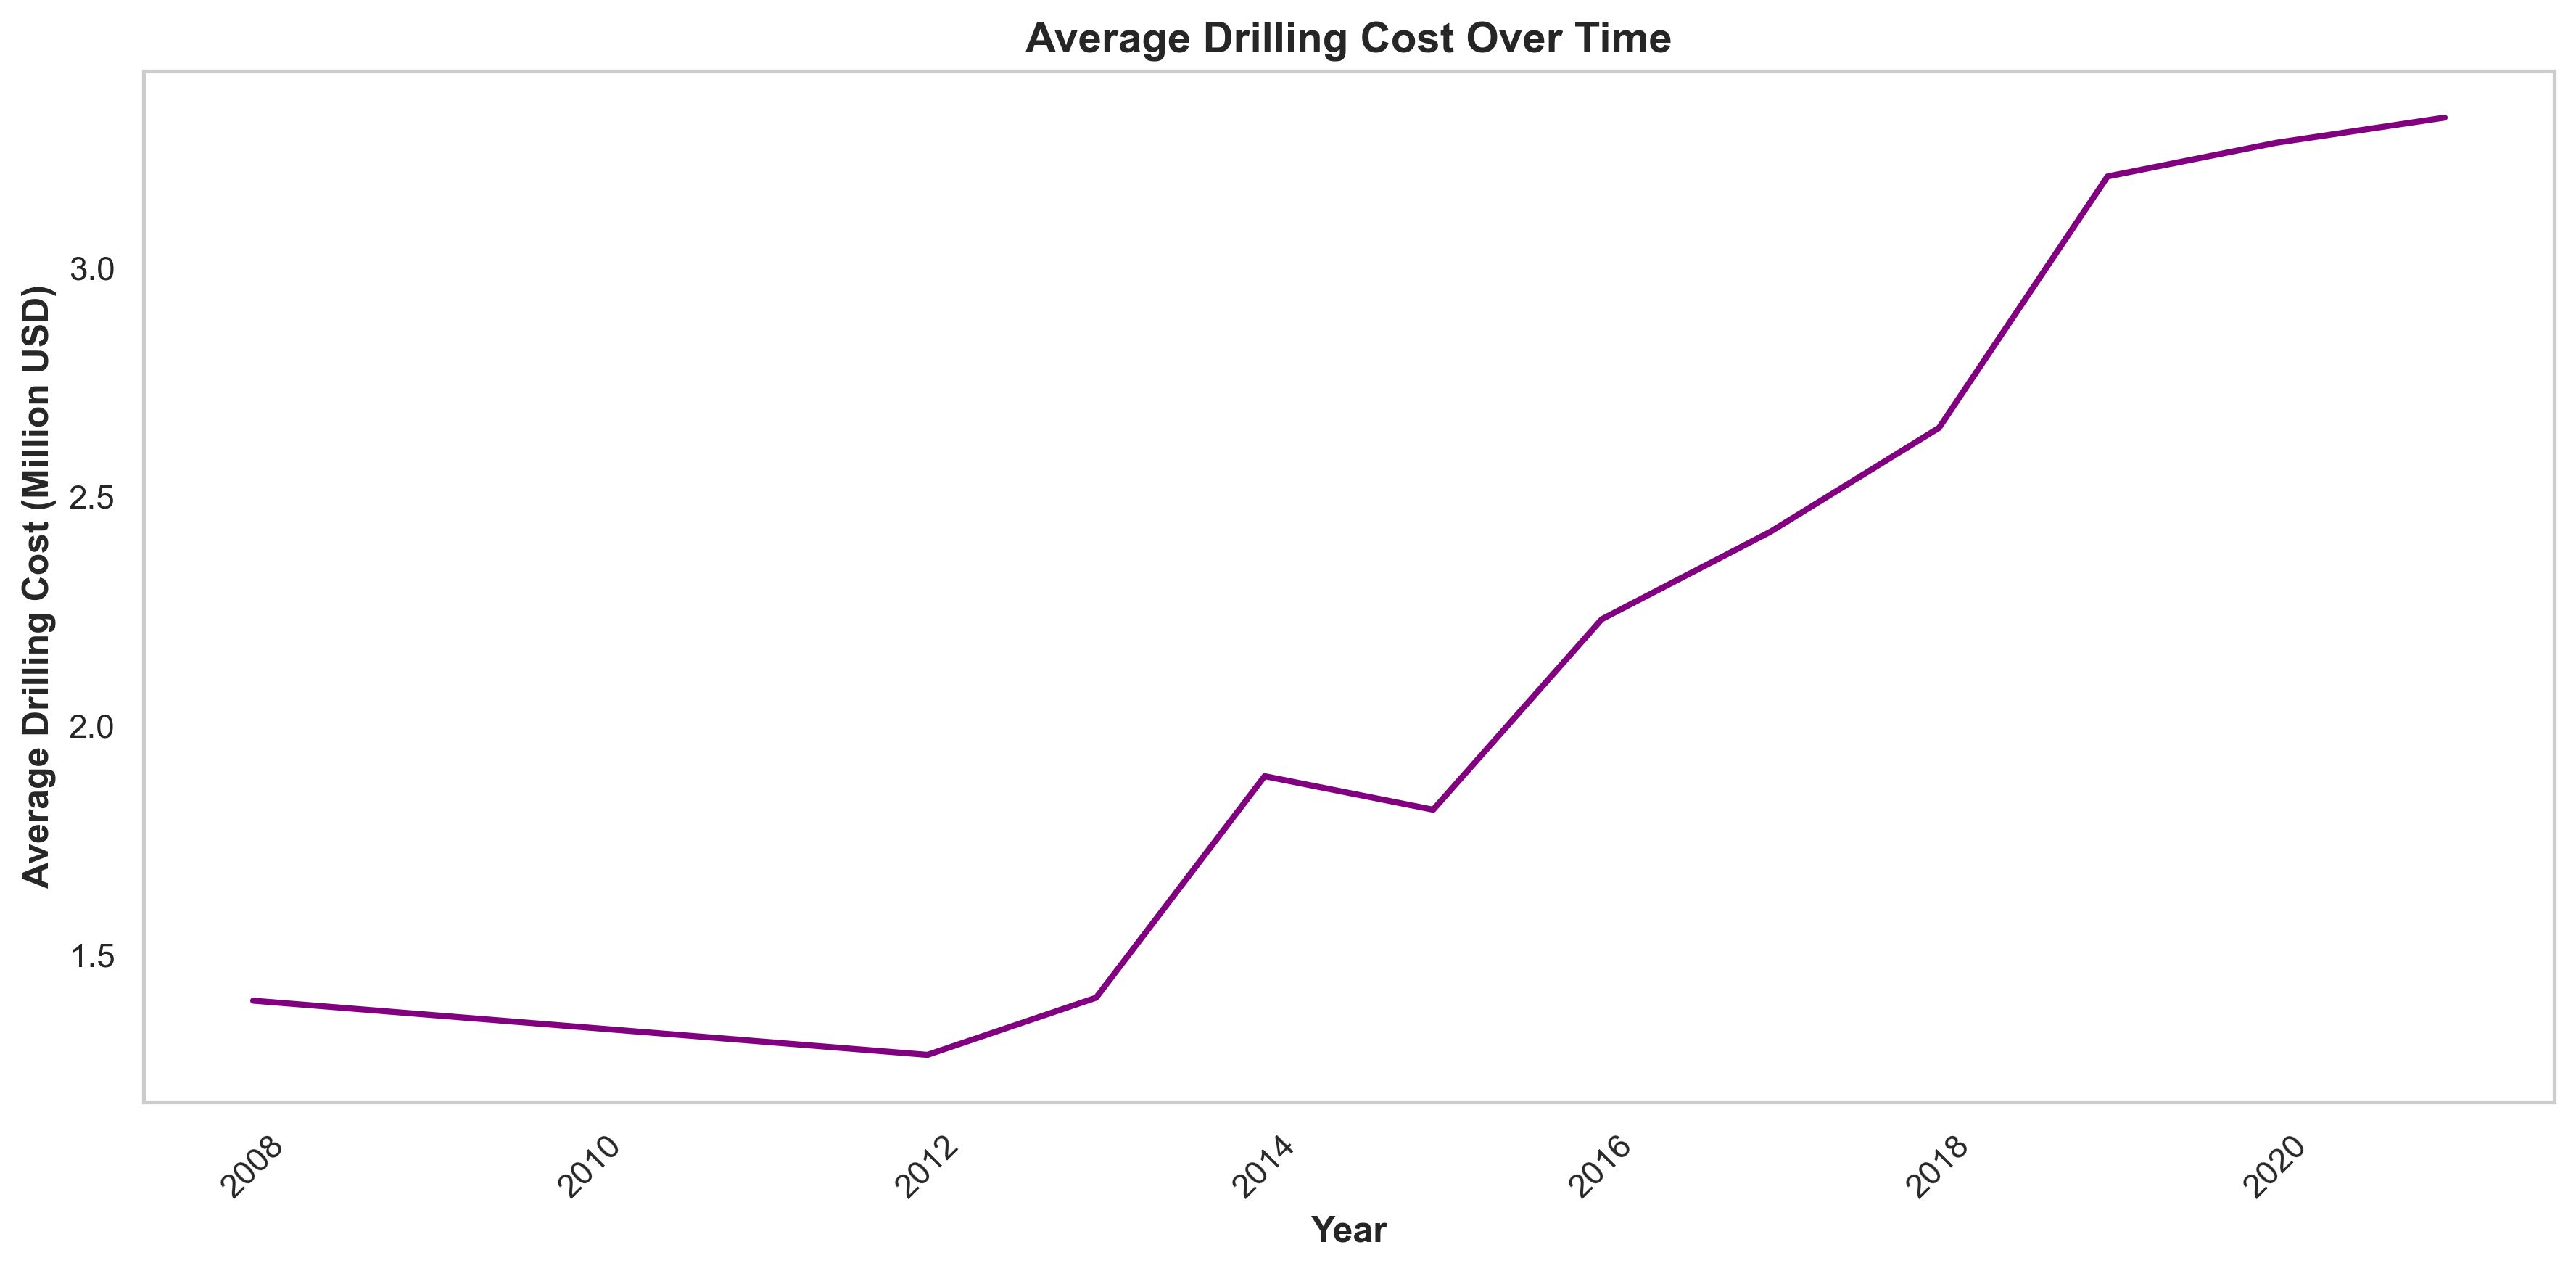

In [29]:
scatter_plot_data['Year'] = scatter_plot_data['DrillingEndDate'].dt.year

scatter_plot_data_clean = scatter_plot_data.dropna(subset=['Year'])

# Distribution of Production
sns.set(style="white")
plt.figure(figsize=(12, 6), dpi=300)
sns.boxplot(data=scatter_plot_data_clean, x='Year', y='Prod_BOE', color='deepskyblue')
plt.title('Distribution of Production Over Years', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Production (BOE)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Drilling Cost Over Time
average_cost_over_time = scatter_plot_data_clean.groupby('Year')['DrillingCost_USDMM'].mean().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(average_cost_over_time['Year'], average_cost_over_time['DrillingCost_USDMM'], color='purple', linewidth=2)
plt.title('Average Drilling Cost Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Drilling Cost (Million USD)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout() 
plt.show()

# ASSUMTIONS:

## PROBLEM 1

* ***Data Completeness***: The analysis assumes that the data set includes every relevant well and that the data is fully populated and does not include any missing entries that could distort the statistical measures.

* ***Continuous Data Collection***: Assuming that all of the data from each well was obtained using the same measurement techniques and standards throughout the duration.

* ***Relevant time frame***: Ensures that the period of time captured by the available data represents a time-frame during which essential quantities can be examined to identify trends from which economic insights can be derived.

* ***Accurate Reporting***: The production data and metadata have been accurately reported and recorded by the operators.

* ***Static Technology and Methods***: The analysis assumes that the technology and methods used in the wells remain constant over the period of data collection, or are sufficiently constant that changes do not significantly alter production outcomes.

## PROBLEM 2

* ***Sustained Demand***: It is safe to assume that there will be a sustained demand for oil and gas since this is the foundation for the economic contributions of the sector.

* ***Stable Prices***: Most of the analyses assume that oil and gas prices remain relatively stable or predictable over time, which affects revenues and profitability.

* ***Technological Efficiency***: It is assumed that horizontal drilling and hydraulic fracturing technologies will continue to increase efficiency and productivity, or enable access to greater resources.

* ***Regulatory Stability***: The analysis assumes that there will be no sudden changes in the regulatory environment that would cause the companies to reduce production and thus their economic contribution.

* ***Environmental Impacts***: It might be assumed that environmental impacts can be contained and that they do not give rise to serious constraints on production.

* ***Infrastructure Capacity***: In the background is the notion that the existing infrastructure can support higher levels of output.

## PROBLEM 3

* ***Technology Indicators***: We assumed that wells with higher production metrics might be utilizing more advanced technology. This is based on the general idea that advanced technologies like horizontal drilling and multi-stage hydraulic fracturing can lead to increased production. However, this is not a definitive indicator of technology use.

* ***Drilling Cost and Date***: We used DrillingEndDate as a proxy for the introduction of new technology, with the assumption that more recent wells are more likely to employ advanced drilling methods. Similarly, DrillingCost_USDMM was used as an indicator, assuming that advanced technology wells might have higher associated costs.

* ***Production Method as a Proxy for Technology***: The ENVProducingMethod was used to compare production metrics, with the assumption that different methods might reflect different technologies. This is not a direct measure of whether horizontal drilling or hydraulic fracturing was used.

# LIMITATIONS:

## PROBLEM 1

* ***Snapshot in time***: Descriptive statistics provide you with a theoretical census taken at that particular time, without any consideration of future technological, economic, or resource-depletion changes.

* ***No Causal Inference***: Does not go beyond describing the data to make causal inferences of whether different factors are related to production volumes.

* ***Entirely natural variability in Geological Conditions***: The analysis may not completely capture naturally occurring variability in the geological conditions, which can hugely impact on the production volumes as well as effectiveness of the technology.

* ***Technological Differentiation***: This factor is limited by the absence of specificities about the technology in questions (horizontal drilling or vertical drilling) which would enable us to verify if production differences is a matter of technological evolution.

* ***Outlook***: Factors, such as market demand, prices and regulations that may affect production volumes are not as a rule accounted for in the underlying analysis.

* ***Hassled by outliers***: Descriptive statistics can be skewed by outliers or distributions of results that are skewed; neither of these will necessarily show up in the bar or pie graph.

## PROBLEM 2

* ***Data Scope***: The analysis only includes data for a subset of wells and production methods.

* ***Technological Specificity***: Absent identifiers, it’s difficult to credit technologies or practices as causes of change in production volumes.

* ***Economic volatility***: The analysis does not take into account the sectoral economic volatility due to exogenous factors such as a recession or change in global oil supply and demand.

* ***Limitations for Long-Term Predictions***: Neither the analysis nor the assumptions can adequately model long-term trends. Estimating declines three or four decades from now is inherently limited as wells age and production declines.

* ***Exclusion of Externalities***: Future externalities, such as environmental degradation or social impacts, are ignored.

* ***Assessment of Sustainability***: While the means of extraction analysed and the consequences for future production capabilities are not explicitly assessed, they at least partly address the question of sustainability over the long term.

## PROBLEM 3

* ***Lack of Direct Technology Labels***: The datasets did not contain explicit labels indicating which wells used traditional methods versus advanced technologies. This limits the precision of any comparative analysis.

* ***Data Quality and Completeness***: The analysis is limited by the quality and completeness of the data. Missing values or errors in the data can skew results. For example, if the drilling cost is not recorded consistently, it could lead to incorrect inferences.

* ***Variability in Production Metrics***: Production can be influenced by a variety of factors beyond technology, such as geology, well management, and market conditions. Our analysis does not account for these factors.

* ***Timeframe of Technological Evolution***: The analysis does not account for when horizontal drilling and multi-stage hydraulic fracturing became prevalent, nor does it identify specific timeframes of technological transitions.

* ***Costs as an Indicator***: Higher drilling costs do not necessarily equate to the use of advanced technology. Costs can be influenced by location, depth, market conditions, and other factors unrelated to technology.

* ***Static Analysis Over Time***: The analysis does not account for changes over time in the way technology impacts production. As technology evolves, its impact on production may change.

* ***Economic and Regulatory Factors***: The analysis does not consider the economic and regulatory environment that can significantly affect both the adoption of technology and production volumes.

* ***Generalization Across Different Geographies***: The results may not be generalizable to all regions, as the adoption of technology and its impact on production can vary significantly by geography.

#  DATA:

I have used Metadata.xlsx and Production Data.xlsx for this analysis. I converted these files into a CSV file and merged them wherever necessary for the study based on my problem.

## Dataset 1 - Metadata.csv


***Why was this dataset used?***

* Share detailed descriptions of wells and their specific locations, e.g., number and type of wells drilled, disposal wells, production wells, saltwater disposal wells, information about servicing wells, etc.

* To allow analysis of how well well traits determine production efficiencies; and to identify patterns or trends in well performance.

***For which problems was it used?***

* To understand how different well characteristics impact oil and gas production.

* To analyze the relationship between well properties and production volumes.

***Data Source:*** The professor provided the dataset. It is a well metadata snapshot at one point and time.

***EDA and Data Quality:***

In doing so, I conducted an exploratory data analysis (EDA) to elucidate the shape, composition and nature of this data. This analysis will help identify missing values, outliers, and data distribution across different fields.

***Constraints on the Data:***

The dataset's accuracy and completeness depend on how it was collected and updated. Unless those kinds of important details – which might include explicit technology labels included, the level of analysis is likely to be shallow.

## Dataset 2 - Production Data.csv

***Why was this dataset used?***

* To analyze production volumes over time for different wells.

* To evaluate the production efficiency of production. And optimise the well effect for production.


***For which problems was it used?***

* To understand production trends and identify factors influencing high or low production volumes.

* To evaluate the economic impact of production levels on a broader scale.



***Data Source:*** The professor provided the dataset. It represents a point in time – for various wells.



***EDA and Data Quality***:

* An EDA was conducted to evaluate the data's structure, consistency, and any anomalies.

* The analysis focuses on understanding production trends and their relationship with well characteristics.


***Constraints on the Data***:

* Just like the metadata set, its accuracy depends on how it was recorded and maintained.

* The dataset didn't fully capture temporal changes in production methods and technologies.

# Problem Solving:

The recommendations for the Oil and Gas trading company across Problems 1, 2, and 3 are centered around embracing advanced drilling and fracturing technologies, focusing on high-potential shale formations, and leveraging data analytics for informed decision-making. These strategies involve adopting multi-stage hydraulic fracturing and horizontal drilling to maximize extraction efficiency, particularly in shale reservoirs like the Permian Basin. Exploring alternative fracturing fluids and water recycling technologies is also recommended to mitigate environmental impacts and sustain water resources. Investing in enhanced recovery techniques and conducting regular geological assessments are crucial for optimizing healthy placement and drilling paths. The company is advised to stay adaptable to environmental and regulatory changes, engage in partnerships for technology development, and ensure continual workforce skill development. Strategic diversification in geographical focus, particularly in promising formations and basins, is recommended for long-term profitability and risk management. Monitoring global market dynamics is crucial, given the changing international energy markets influenced by the U.S. resurgence in oil production. These recommendations are derived from a detailed analysis of the provided data, focusing on technological advancements, environmental sustainability, and economic viability to guide the company in making better-informed trades and enhancing its competitive edge in the market.

## Problem 1:

1. ***Embrace Advanced Fracturing Techniques***: Adopt multi-stage hydraulic fracturing and horizontal drilling. These technologies have been pivotal in unlocking previously inaccessible shale oil resources. They allow for more efficient extraction by maximizing the reservoir's surface area in contact with the well, leading to increased production rates.

2. ***Utilize Alternative Fracturing Fluids***: Explore the use of alternative fluids like liquid nitrogen, propane, and butane for hydraulic fracturing. These alternatives can mitigate the environmental impact and reduce the dependency on water, which is a critical concern in areas with scarce water resources.

3. ***Implement Water Recycling and Use of Saline Water***: Adopt technologies that allow the use of recycled water from fracture treatments and saline water. This approach can reduce the strain on local freshwater supplies and is a more sustainable option for the water-intensive fracturing process.

4. ***Focus on Shale Reservoirs***: Given the vast potential of shale reservoirs, a strategic focus on these resources can be beneficial. While challenging due to their low permeability and the small size of pore spaces, successful extraction from these reservoirs can yield significant returns.

5. ***Invest in Enhanced Recovery Techniques***: Beyond initial extraction, invest in enhanced recovery methods like waterflooding, which can significantly increase the output from older fields. This approach can rejuvenate declining fields and prolong their productive life.

6. ***Integrate Data Analytics for Well Optimization***: Leverage data analytics to optimize healthy placement, drilling paths, and fracturing stages. Advanced analytics can help make informed decisions, leading to cost-effective operations and maximized output.

7. ***Conduct Geologic Assessments***: Regular geological assessments are vital. Understanding the geology of potential sites can help identify promising areas for exploration and guide drilling strategies to optimize resource extraction.

8. ***Adapt to Environmental and Regulatory Challenges***: Stay informed and adaptable to environmental concerns and regulatory changes. Engaging in environmentally responsible practices not only ensures compliance but can also enhance the company's reputation.

9. ***Explore Partnerships for Technology Development***: Consider partnerships with technology companies to develop or acquire cutting-edge technologies for exploration and extraction. Collaborating can spread out the costs and risks associated with technological innovations.

10. ***Continual Skill Development and Training***: Invest in the workforce's continual training and skill development, especially in new technologies and methods. A skilled workforce is essential for effectively applying advanced technologies and methodologies.

## Problem 2:

1. ***Embrace Advanced Drilling Technologies***: Given the significant impact of horizontal drilling and advanced hydraulic fracturing techniques on increasing oil and gas production, the company should consider investing in or partnering with operations that utilize these technologies. This could lead to trading in more productive wells.

2. ***Focus on Shale Formations***: Prioritize trading in production rights for wells located in shale formations, especially in the Permian Basin and potentially in the San Juan Basin, where exploratory drilling is showing favorable results. These areas are identified as having significant remaining untapped resources and promise for future exploration.

3. ***Invest in Research and Exploration***: Encourage and invest in ongoing geological research and exploration activities, particularly in formations like the Bone Spring Formation and other shale formations within the Permian Basin that remain incompletely evaluated.

4. ***Technological Innovation and Sustainability***: Pay attention to technological innovations that address environmental concerns, such as using saline, recycled, or brackish waters in hydraulic fracturing. This approach makes the process more sustainable and addresses the potential strain on local water supplies, which can be a critical concern in trading decisions.

5. ***Diversification in Geographical Focus***: While the Permian Basin has been the primary focus, exploring and trading rights in other basins, like the San Juan Basin, can offer new opportunities and diversify the portfolio, especially considering its potential revitalization and favorable initial drilling results.

6. ***Long-term Outlook***: Acknowledge the long-term potential of the industry, as indicated by the prospect of years, if not decades, of drilling in formations like the Bone Spring Formation. This long-term outlook should be a key consideration in trading strategies for long-term profitability.

7. ***Risk Management***: While advanced drilling technologies have revolutionized oil and gas production, they come with risks and challenges. The company should develop robust risk management strategies that consider these operations' economic, environmental, and technological aspects.

8. ***Environmental and Regulatory Compliance***: Ensure that all trading activities and partnerships comply with environmental regulations and best practices, which can significantly affect the company's reputation and operations.

## Problem 3:

1. ***Leverage Advanced Drilling Technologies***: Embrace and invest in horizontal drilling and multi-stage hydraulic fracturing, as these techniques have revolutionized oil and natural gas exploration and production, particularly in shales. These technologies allow the exploitation of oil resources previously inaccessible to conventional vertical wells.
2. ***Expand Exploration in Promising Formations***: Focus on exploratory drilling in the Permian Basin, particularly in formations like the Bone Spring and Mancos Shale. These areas show significant potential for oil and natural gas production, with drilling starting to tap these resources.
3. ***Incorporate Water-Saving and Alternative Technologies***: Explore technologies that reduce or eliminate the need for water in fracturing treatments, such as gas fracking. This could be especially important in areas where scarce water resources can lead to better production outcomes.
4. ***Consider Environmental and Regulatory Compliance***: Ensure strict adherence to environmental regulations, particularly concerning the potential contamination of drinking water aquifers. Incorporating environmentally friendly techniques in the fracking process can mitigate some ecological concerns.
5. ***Assess the Economic Viability of Wells***: Given the high cost associated with horizontal wells, conduct thorough economic analyses to balance the higher production against the additional costs. This will ensure the profitability of the wells over their lifecycle.
6. ***Monitor Global Market Dynamics***: Stay informed about global market dynamics, as the U.S. resurgence in oil production is changing the international energy markets. This affects the company's trading strategies, particularly in shifting supply and demand patterns worldwide.
7. ***Plan for Long-term Resource Development***: Adopt a long-term view in resource development, as maximum development of shale resources, especially in areas like the Bone Spring Formation, is expected to take decades. This approach will ensure sustained production and profitability over time.
8. ***Strengthen Data Analytics Capabilities***: Enhance data analytics capabilities to predict production volumes and trends better. This will improve the accuracy of 'type curves' and aid in making more informed trading decisions.
9. ***Engage in Strategic Partnerships***: Form strategic partnerships with technology providers and exploration companies to stay at the forefront of advancements in drilling and extraction technologies.
10. ***Prepare for Industry Shifts***: Be prepared for shifts in the industry, especially with the potential for North America to become energy-independent. This could significantly impact the trading landscape and require adaptive strategies.

## Conclusion:

Analyzing the oil and gas industry data reveals significant opportunities for the trading company to enhance its decision-making process. By embracing advanced drilling and fracturing technologies, focusing on high-potential shale formations, and leveraging data analytics, the company can optimize its trading strategies, improve production efficiency, and gain a competitive edge. The recommendations aim to maximize profitability while ensuring environmental sustainability and regulatory compliance. The report highlights the importance of adapting to technological advancements, diversifying geographical focus, and staying informed about global market dynamics. The company must invest in technology, workforce skill development, and strategic partnerships to successfully navigate the oil and gas industry's evolving landscape.